In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib seaborn

In [ ]:
%pip install networkx

In [ ]:
%pip install plotly

In [ ]:
%pip install nbformat

In [ ]:
%pip install ipykernel

In [ ]:
%pip install --upgrade nbformat

In [ ]:
%pip install nbformat 

In [68]:
# importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import networkx as nx
from math import sqrt
from math import exp
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import clear_output

In [13]:
# Cria uma solucao inicial com as cidades em um ordem aleatoria

def solucao_aleatoria(tsp):
    cidades = list(tsp.keys())
    solucao = []

    # as 3 linhas abaixo não são estritamente necessarias, servem
    # apenas para fixar a primeira cidade da lista na solução
    cidade = cidades[0]
    solucao.append(cidade)
    cidades.remove(cidade)

    for _ in range(0,len(cidades)):
        #print(_, cidades, solucao)
        cidade = random.choice(cidades)

        solucao.append(cidade)
        cidades.remove(cidade)

    return solucao

In [3]:
# Gera aleatoriamente as coordenadas de N cidades.
# Obs: esta informação geralmente é fornecida como entrada do problema.

def gera_coordenadas_aleatorias(n_cidades):
    minimo = 10
    maximo = 90
    escala = (maximo-minimo)-1

    # gera n coordenadas (x,y) aleatorias entre [min, max]
    X = minimo + escala * np.random.rand(n_cidades)
    Y = minimo + escala * np.random.rand(n_cidades)
    coordenadas = {'X':X, 'Y': Y}

    cidades = ['A'+str(i) for i in range(n_cidades)]

    df_cidades = pd.DataFrame(coordenadas, index=cidades)
    df_cidades.index.name = 'CIDADE'

    return df_cidades

In [4]:
# distancia Euclidiana entre dois pontos
def distancia(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    return sqrt(dx**2 + dy**2)

In [5]:
# Calcula matriz de distancias.
#
# OBS:  Não é estritamente necessario calculá-las a priori.
#       Foi feito assim apenas para fins didáticos.
#       Ao invés, as distâncias podem ser calculadas sob demanda.

def gera_matriz_distancias(Coordenadas):

    n_cidades = len(Coordenadas)
    dist = np.zeros((n_cidades,n_cidades), dtype=float)

    for i in range(0, n_cidades):
        for j in range(i+1, n_cidades):
            x1,y1 = Coordenadas.iloc[i]
            x2,y2 = Coordenadas.iloc[j]

            dist[i,j] = distancia(x1,y1,x2,y2)
            dist[j,i] = dist[i,j]

    return dist

In [6]:
# Recebe uma lista com as coordenadas reais de uma cidade e
# gera uma matriz de distancias entre as cidades.
# Obs: a matriz é simetrica e com diagonal nula
def gera_problema_tsp(df_cidades):
    # nomes ficticios das cidades
    cidades = df_cidades.index

    # calcula matriz de distancias
    distancias = gera_matriz_distancias(df_cidades)

    # cria estrutura para armazena as distâncias entre todas as cidades
    tsp = pd.DataFrame(distancias, columns=cidades, index=cidades)

    return tsp

In [7]:
# Plota a solução do roteamento das cidades
# usando a biblioteca PLOTLY
def plota_rotas(df_cidades, ordem_cidades):
    df_solucao = df_cidades.copy()
    df_solucao = df_solucao.reindex(ordem_cidades)

    X = df_solucao['X']
    Y = df_solucao['Y']
    cidades = list(df_solucao.index)

    # cria objeto gráfico
    fig = go.Figure()

    fig.update_layout(autosize=False, width=500, height=500, showlegend=False)

    # gera linhas com as rotas da primeira ate a ultima cidade
    fig.add_trace(go.Scatter(x=X, y=Y,
                             text=cidades, textposition='bottom center',
                             mode='lines+markers+text',
                             name=''))

    # acrescenta linha da última para a primeira para fechar o ciclo
    fig.add_trace(go.Scatter(x=X.iloc[[-1,0]], y=Y.iloc[[-1,0]],
                             mode='lines+markers', name=''))

    fig.show()

In [8]:
n_cidades=10
df_coordenadas = gera_coordenadas_aleatorias(n_cidades)
df_coordenadas

X          Y
CIDADE                      
A0      78.196656  76.679819
A1      34.764039  80.734850
A2      68.141847  34.156060
A3      26.792879  38.876939
A4      47.886766  67.631953
A5      54.782487  60.852554
A6      79.613989  13.717934
A7      79.668407  60.935228
A8      36.497645  82.465976
A9      40.124213  34.128599

In [9]:
tsp = gera_problema_tsp(df_coordenadas)
tsp

CIDADE         A0         A1         A2         A3         A4         A5  \
CIDADE                                                                     
A0       0.000000  43.621503  43.696330  63.807570  31.631524  28.261734   
A1      43.621503   0.000000  57.303244  42.610141  18.544322  28.214251   
A2      43.696330  57.303244   0.000000  41.617591  39.126765  29.852559   
A3      63.807570  42.610141  41.617591   0.000000  35.662346  35.585753   
A4      31.631524  18.544322  39.126765  35.662346   0.000000   9.670120   
A5      28.261734  28.214251  29.852559  35.585753   9.670120   0.000000   
A6      62.977836  80.639848  23.437727  58.506796  62.556680  53.275472   
A7      15.813229  49.075731  29.154509  57.292142  32.479514  24.886057   
A8      42.098540   2.449937  57.751221  44.656317  18.701880  28.310342   
A9      57.097436  46.913474  28.017647  14.151721  34.390870  30.480072   

CIDADE         A6         A7         A8         A9  
CIDADE                                              
A0      62.977836  15.813229  42.098540  57.097436  
A1      80.639848  49.075731   2.449937  46.913474  
A2      23.437727  29.154509  57.751221  28.017647  
A3      58.506796  57.292142  44.656317  14.151721  
A4      62.556680  32.479514  18.701880  34.390870  
A5      53.275472  24.886057  28.310342  30.480072  
A6       0.000000  47.217325  81.149938  44.452645  
A7      47.217325   0.000000  48.241971  47.773827  
A8      81.149938  48.241971   0.000000  48.473229  
A9      44.452645  47.773827  48.473229   0.000000

In [15]:
solucao = ['A'+str(i) for i in range(n_cidades)]
print(solucao)
plota_rotas(df_coordenadas, solucao)

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']


In [14]:
solucao = solucao_aleatoria(tsp)
print(solucao)
plota_rotas(df_coordenadas, solucao)

['A0', 'A1', 'A3', 'A6', 'A9', 'A4', 'A2', 'A7', 'A8', 'A5']


In [16]:
# Função Objetivo: calcula custo de uma dada solução.
# Obs: Neste caso do problema do caixeiro viajante (TSP problem),
# o custo é o comprimento da rota entre todas as cidades.
def calcula_custo(tsp, solucao):

    N = len(solucao)
    custo = 0

    for i in range(N):

        # Quando chegar na última cidade, será necessário
        # voltar para o início para adicionar o
        # comprimento da rota da última cidade
        # até a primeira cidade, fechando o ciclo.
        #
        # Por isso, a linha abaixo:
        k = (i+1) % N
        cidadeA = solucao[i]
        cidadeB = solucao[k]

        custo += tsp.loc[cidadeA, cidadeB]

        #print(tsp.loc[cidadeA, cidadeB], cidadeA,cidadeB)

    return custo

In [17]:
# A partir de uma dada solução, gera diversas variações (vizinhos)
def gera_vizinhos(solucao):

    N = len(solucao)
    for i in range(1, N):       # deixa o primeiro fixo
        for j in range(i + 1, N):
            vizinho = solucao.copy()
            vizinho[i] = solucao[j]
            vizinho[j] = solucao[i]

            yield(vizinho)

In [18]:
def obtem_melhor_vizinho(tsp, solucao):
    melhor_custo = calcula_custo(tsp, solucao)
    melhor_vizinho = solucao

    for vizinho in gera_vizinhos(solucao):
        custo_atual = calcula_custo(tsp, vizinho)
        if custo_atual < melhor_custo:
            melhor_custo = custo_atual
            melhor_vizinho = vizinho

    return melhor_vizinho, melhor_custo

In [19]:
def hill_climbing(tsp):

    # solucao inicial
    solucao_inicial = solucao_aleatoria(tsp)
    # melhor solucao ate o momento
    solucao_melhor, custo_melhor = obtem_melhor_vizinho(tsp, solucao_inicial)

    while True:

        # tenta obter um candidato melhor
        candidato_novo, custo_novo = obtem_melhor_vizinho(tsp, solucao_melhor)
        #print(custo_melhor, custo_novo)

        if custo_novo < custo_melhor:
            custo_melhor   = custo_novo
            solucao_melhor = candidato_novo
        else:
            break   # custo nao melhorou, entao sai do while

    return custo_melhor, solucao_melhor

In [20]:
def hill_climbing_restart(tsp):

    for _ in range(50):

        # solucao inicial
        solucao_inicial = solucao_aleatoria(tsp)
        # melhor solucao ate o momento
        solucao_melhor, custo_melhor = obtem_melhor_vizinho(tsp, solucao_inicial)

        while True:

            # tenta obter um candidato melhor
            candidato_atual, custo_atual = obtem_melhor_vizinho(tsp, solucao_melhor)
            #print(custo_melhor, custo_atual)

            if custo_atual < custo_melhor:
                custo_melhor   = custo_atual
                solucao_melhor = candidato_atual
            else:
                break   # custo nao melhorou, entao sai do while

    return custo_melhor, solucao_melhor

In [21]:
custo, solucao = hill_climbing(tsp)

print(f'{custo:7.3f}    {solucao}')

plota_rotas(df_coordenadas, solucao)

267.439    ['A0', 'A7', 'A9', 'A3', 'A1', 'A8', 'A4', 'A5', 'A2', 'A6']


In [22]:
custo, solucao = hill_climbing_restart(tsp)

print(f'{custo:7.3f}    {solucao}')

plota_rotas(df_coordenadas, solucao)

256.044    ['A0', 'A2', 'A6', 'A9', 'A3', 'A5', 'A4', 'A1', 'A8', 'A7']


In [23]:
# Executando várias vezes de forma simples

n_vezes = 30

for _ in range(n_vezes):

    #solucao, custo = random_walk(tsp)
    custo, solucao = hill_climbing(tsp)
    print(f'{custo:7.3f}, {solucao}')

239.870, ['A0', 'A7', 'A5', 'A4', 'A8', 'A1', 'A3', 'A9', 'A6', 'A2']
262.251, ['A0', 'A5', 'A9', 'A3', 'A1', 'A8', 'A4', 'A2', 'A6', 'A7']
247.987, ['A0', 'A7', 'A5', 'A2', 'A6', 'A9', 'A3', 'A1', 'A8', 'A4']
235.359, ['A0', 'A7', 'A2', 'A6', 'A9', 'A3', 'A5', 'A4', 'A1', 'A8']
257.016, ['A0', 'A8', 'A1', 'A3', 'A9', 'A6', 'A2', 'A5', 'A4', 'A7']
228.704, ['A0', 'A7', 'A2', 'A6', 'A9', 'A3', 'A1', 'A8', 'A4', 'A5']
235.359, ['A0', 'A7', 'A2', 'A6', 'A9', 'A3', 'A5', 'A4', 'A1', 'A8']
228.704, ['A0', 'A7', 'A2', 'A6', 'A9', 'A3', 'A1', 'A8', 'A4', 'A5']
247.987, ['A0', 'A4', 'A8', 'A1', 'A3', 'A9', 'A6', 'A2', 'A5', 'A7']
239.870, ['A0', 'A7', 'A5', 'A4', 'A8', 'A1', 'A3', 'A9', 'A6', 'A2']
257.763, ['A0', 'A7', 'A3', 'A9', 'A6', 'A2', 'A5', 'A4', 'A1', 'A8']
228.704, ['A0', 'A5', 'A4', 'A8', 'A1', 'A3', 'A9', 'A6', 'A2', 'A7']
257.763, ['A0', 'A8', 'A1', 'A4', 'A5', 'A2', 'A6', 'A9', 'A3', 'A7']
257.763, ['A0', 'A8', 'A1', 'A4', 'A5', 'A2', 'A6', 'A9', 'A3', 'A7']
262.251, ['A0', 'A7'

In [24]:
# Cria estruta de dados (DataFrame) para armazenar vários resultados
# diferentes e visualizá-los através de estatísticas

def cria_df_custos(algoritmos, n_vezes):

    nomes_algoritmos  = algoritmos.keys()

    n_lin = len(nomes_algoritmos)
    n_col = n_vezes

    df_results = pd.DataFrame(np.zeros((n_lin, n_col)),
                              index=nomes_algoritmos)
    df_results.index.name='ALGORITMO'

    return df_results

In [25]:
# Executa N vezes para gerar estatísticas da variável custo
def executa_n_vezes(tsp, algoritmos, n_vezes):

    # Cria DataFrame para armazenar os resultados
    df_custo = cria_df_custos(algoritmos, n_vezes)

    for algoritmo, funcao_algoritmo in algoritmos.items():

        print(algoritmo)

        for i in range(n_vezes):

            custo, solucao = funcao_algoritmo(tsp)
            df_custo.loc[algoritmo,i] = custo

            print(f'{custo:10.3f}  {solucao}')

    return df_custo

In [48]:
# Dicionario com Nomes dos modelos e suas respectivas variantes
# Tuple: (Algoritmo, Variante): funcao_algoritmo
algoritmos = {
    'Hill-Climbing Restart': hill_climbing_restart,
    'Hill-Climbing': hill_climbing
}

In [41]:

n_cidades = 10
df_coordenadas = gera_coordenadas_aleatorias(n_cidades)

tsp = gera_problema_tsp(df_coordenadas)

# numero de vezes que executará cada algoritmo
n_vezes = 100

# Executa N vezes para gerar estatísticas da variável custo
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

Hill-Climbing Restart
   276.102  ['A0', 'A3', 'A4', 'A1', 'A5', 'A9', 'A6', 'A2', 'A7', 'A8']
   262.881  ['A0', 'A8', 'A7', 'A3', 'A9', 'A5', 'A6', 'A2', 'A1', 'A4']
   234.226  ['A0', 'A3', 'A9', 'A5', 'A1', 'A4', 'A2', 'A6', 'A7', 'A8']
   235.902  ['A0', 'A8', 'A7', 'A4', 'A1', 'A2', 'A6', 'A5', 'A9', 'A3']
   304.306  ['A0', 'A2', 'A1', 'A4', 'A7', 'A8', 'A6', 'A5', 'A9', 'A3']
   262.881  ['A0', 'A8', 'A7', 'A3', 'A9', 'A5', 'A6', 'A2', 'A1', 'A4']
   234.226  ['A0', 'A3', 'A9', 'A5', 'A1', 'A4', 'A2', 'A6', 'A7', 'A8']
   304.961  ['A0', 'A6', 'A2', 'A1', 'A4', 'A7', 'A8', 'A5', 'A9', 'A3']
   235.902  ['A0', 'A8', 'A7', 'A4', 'A1', 'A2', 'A6', 'A5', 'A9', 'A3']
   235.902  ['A0', 'A3', 'A9', 'A5', 'A6', 'A2', 'A1', 'A4', 'A7', 'A8']
   276.102  ['A0', 'A3', 'A4', 'A1', 'A5', 'A9', 'A6', 'A2', 'A7', 'A8']
   250.245  ['A0', 'A8', 'A7', 'A3', 'A9', 'A5', 'A1', 'A4', 'A2', 'A6']
   304.306  ['A0', 'A3', 'A9', 'A5', 'A6', 'A8', 'A7', 'A4', 'A1', 'A2']
   317.481  ['A0', 'A6', 'A5'

In [42]:
df_custo.T.describe()

ALGORITMO  Hill-Climbing Restart  Hill-Climbing
count                 100.000000     100.000000
mean                  264.984407     263.042975
std                    23.337363      25.468780
min                   234.226346     234.226346
25%                   246.659108     235.901640
50%                   262.880955     260.691934
75%                   277.762498     276.102121
max                   317.480796     335.933759

In [60]:
def boxplot_sorted(df, rot=90, figsize=(12,6), fontsize=20):
    df2 = df.T
    meds = df2.median().sort_values(ascending=False)
    axes = df2[meds.index].boxplot(figsize=figsize, rot=rot, fontsize=fontsize,
                                   boxprops=dict(linewidth=4, color='cornflowerblue'),
                                   whiskerprops=dict(linewidth=4, color='cornflowerblue'),
                                   medianprops=dict(linewidth=4, color='firebrick'),
                                   capprops=dict(linewidth=4, color='cornflowerblue'),
                                   flierprops=dict(marker='o', markerfacecolor='dimgray',
                                        markersize=12, markeredgecolor='black'),
                                   return_type="axes")

    axes.set_title("Custo do Algoritmos", fontsize=fontsize)
    plt.show()

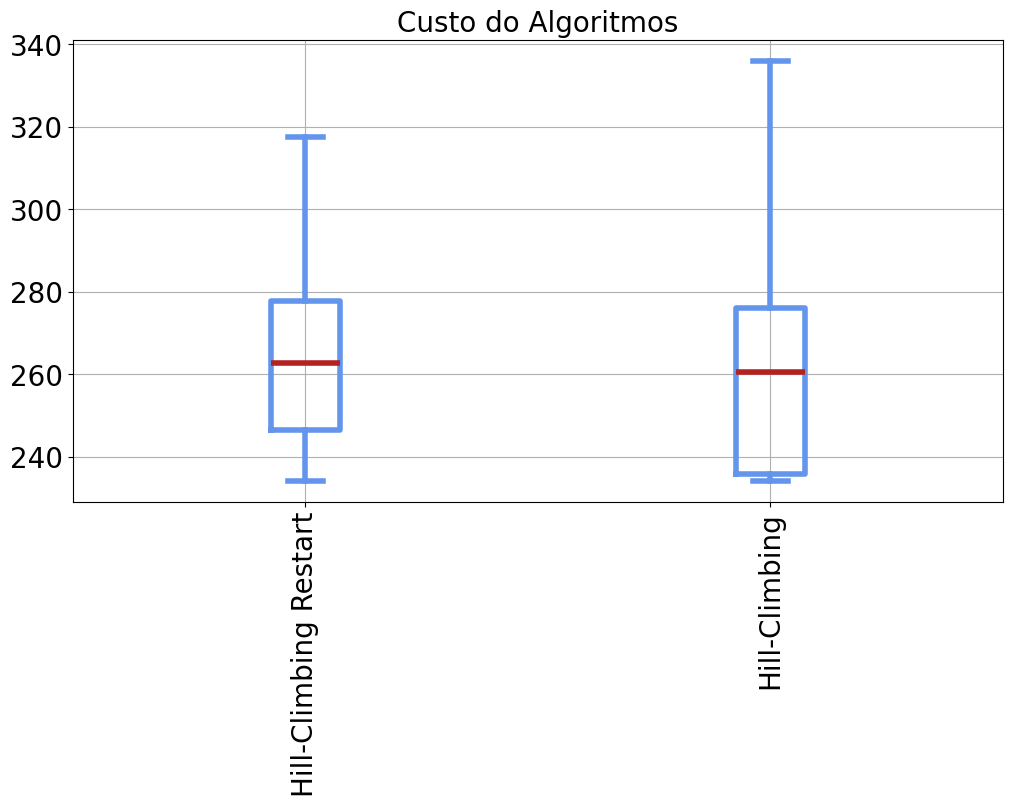

In [61]:
%matplotlib inline
boxplot_sorted(df_custo)

In [64]:
def plot_path(cities_xy, cities_path, ax):

    # Reeordena as cidades pela ordem do caminho
    cities = cities_xy[cities_path]

    # Repete a primeira cidade para fechar o ciclo
    x = cities[:,0]
    y = cities[:,1]

    # Personalização do gráfico
    ax.set_xlabel('X (Longitude)')
    ax.set_ylabel('Y (Latitude)')
    ax.set_title('Caminho')

    # Plotagem das coordenadas interligadas com pontos vermelhos e linhas azuis
    ax.plot(x, y, color='blue', linestyle='-', linewidth=2)
    ax.plot(x, y, color='red', marker='o', markersize=8, linestyle='')
    ax.plot(x[[-1,0]], y[[-1,0]], color='orange', linestyle='-', linewidth=2)

def plot_distances(iteration_list, distance_list, best_distances, ax):

    x  = iteration_list
    y1 = distance_list
    y2 = best_distances

    # Personalização do gráfico
    ax.set_xlabel('Iterações')
    ax.set_ylabel('Distâncias (custos)')
    ax.set_title('Comprimento Total do caminho')

    ax.plot(x,y1, label='Atual')
    ax.plot(x,y2, label='Melhor')
    ax.legend()

def plot_acceptance_prob(iteration_list, accept_p_list, ax):

    x = iteration_list
    y = accept_p_list

    # Personalização do gráfico
    ax.set_xlabel('Iterações')
    ax.set_ylabel('Probabilidade')
    ax.set_title('Probabilidade de Aceitação')

    ax.set_ylim([0, 1.05])

    # Criar uma nova lista de cores com base nos valores de y
    xc, yc, colors = zip(*[(xi, yi, 'b') if yi==1.0 else (xi, yi, 'r') \
                           for xi, yi in enumerate(y)])

    ax.scatter(xc, yc, c=colors, s=2)

def plot_temperature(iteration_list, temperat_list, ax):

    x = iteration_list
    y = temperat_list

    # Personalização do gráfico
    ax.set_xlabel('Iterações')
    ax.set_ylabel('Temperatura')
    ax.set_title('Decaimento da Temperatura')

    ax.set_ylim([0, 1000])

    ax.plot(x,y)

#----------------------------------------------------------------

def plot_axes_figure(cities_xy, cities_path, iteration_list,
                     distance_list, best_distances,
                     accept_p_list, temperat_list):

    x = iteration_list
    y1 = distance_list
    y2 = best_distances
    y3 = accept_p_list
    y4 = temperat_list

    clear_output(wait=True)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))

    plot_path(cities_xy, cities_path, ax1)
    plot_distances      (x, y1, y2, ax2)
    plot_acceptance_prob(x, y3, ax3)
    plot_temperature    (x, y4, ax4)

    # Ajusta o espaçamento entre os subgráficos
    fig.tight_layout()

    plt.pause(0.001)

#-----------------------------------------------------
#-----------------------------------------------------


In [72]:
import math
def calculate_distance(city_a, city_b):
    return np.linalg.norm(city_a - city_b)

def total_distance(route, distance_matrix):
    total = 0
    for i in range(len(route) - 1):
        city_a = route[i]
        city_b = route[i + 1]
        total += distance_matrix[city_a, city_b]
    return total

def generate_neighbor(route):
    new_route = route.copy()
    index_a = random.randint(0, len(route) - 1)
    index_b = random.randint(0, len(route) - 1)
    new_route[index_a], new_route[index_b] = new_route[index_b], new_route[index_a]
    return new_route

def acceptance_probability(current_distance, new_distance, temperature):
    if new_distance < current_distance: # melhor == menor (<)
        return 1.0
    else:
        return math.exp((current_distance - new_distance) / temperature)

def simulated_annealing(cities, initial_temperature, cooling_rate, iterations, nrep=50):

    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = calculate_distance(cities[i], cities[j])

    current_route = np.arange(num_cities)
    best_route = current_route.copy()

    current_distance = total_distance(current_route, distance_matrix)
    best_distance = current_distance

    temperature = initial_temperature

    #-----------------------------------------------
    iteration_list = []
    best_distances = []
    distance_list  = []
    accept_p_list  = []
    temperat_list  = []
    #-----------------------------------------------

    for iteration in range(iterations):

        # numero de vizinhos a serem gerados e testados para cada iteração
        for _ in range(nrep):

            new_route = generate_neighbor(current_route)
            new_distance = total_distance(new_route, distance_matrix)

            acceptance_prob = acceptance_probability(current_distance, new_distance, temperature)

            #print(acceptance_prob)

            if random.random() < acceptance_prob:
                current_route = new_route
                current_distance = new_distance

        temperature *= cooling_rate


        #-----------------------------------------------
        if new_distance < best_distance:
            best_route = new_route
            best_distance = new_distance

        iteration_list += [iteration]
        best_distances += [best_distance]
        distance_list  += [current_distance]
        accept_p_list  += [acceptance_prob]
        temperat_list  += [temperature]

        if iteration % 50 == 0:
            plot_axes_figure(cities, current_route, iteration_list,
                            distance_list, best_distances,
                            accept_p_list, temperat_list)
        #-----------------------------------------------

    # plt.show()

    return best_route, best_distance

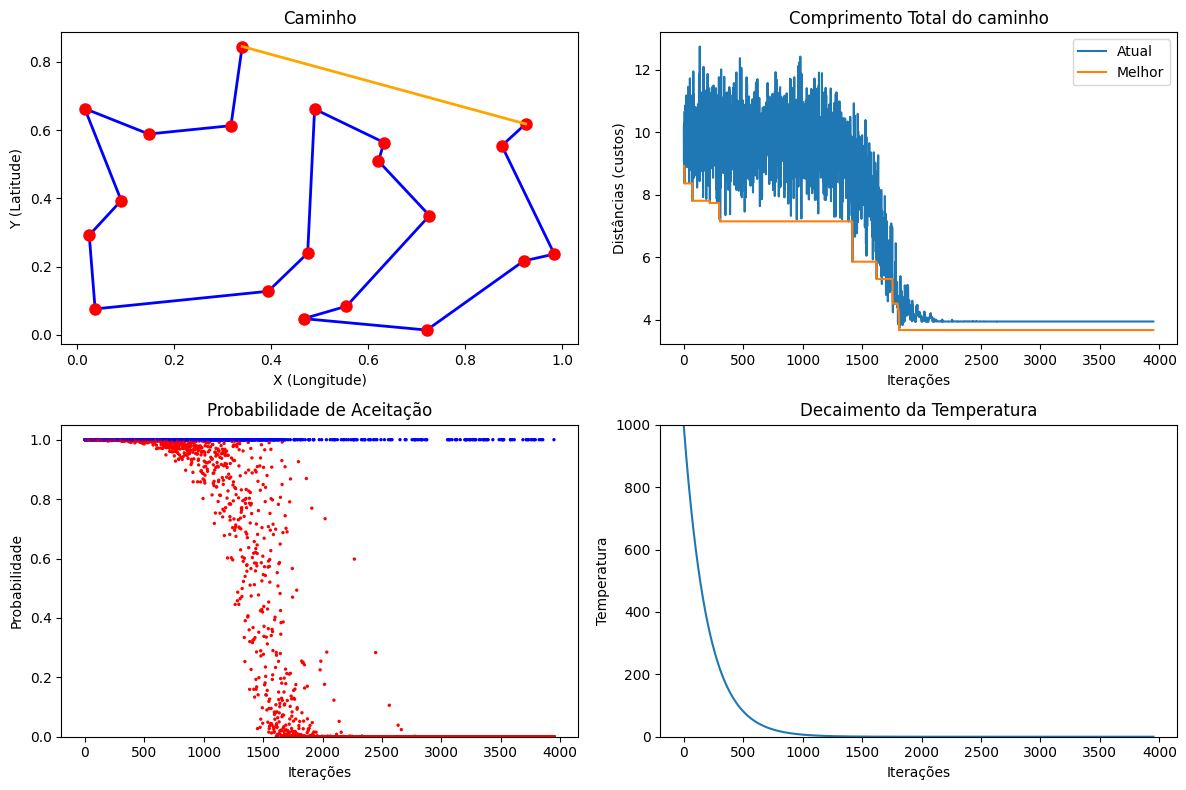

Best route: [ 1  9  5 12 18  7 19  3  6 16 13 17  4  8 11 15 14  0 10  2]
Best distance: 3.673903915676704


In [73]:
def main():
    # Exemplo de uso
    num_cities = 20
    cities = np.random.rand(num_cities, 2)

    initial_temperature = 1000.0
    cooling_rate = 0.995
    iterations = 4000

    best_route, best_distance = simulated_annealing(cities, initial_temperature, cooling_rate, iterations)

    print("Best route:", best_route)
    print("Best distance:", best_distance)

main()


In [74]:
num_cities = 20
cities = np.random.rand(num_cities, 2)
print(cities)

[[4.07240741e-01 9.34632932e-01]
 [5.03755919e-02 5.42659323e-01]
 [1.11420208e-01 6.46463875e-01]
 [4.26833141e-01 3.88447052e-01]
 [2.01710932e-01 3.65633876e-01]
 [5.69482135e-01 8.78380721e-01]
 [9.36876938e-01 7.94566576e-01]
 [1.57922463e-01 9.49617637e-01]
 [3.77784134e-01 9.27588404e-02]
 [5.96431975e-01 8.99490904e-01]
 [5.83212556e-01 9.43718286e-01]
 [2.11081528e-02 8.92632339e-01]
 [9.45766893e-01 9.86336323e-02]
 [5.55892484e-06 8.47180137e-01]
 [7.88796380e-01 5.65599993e-01]
 [9.77299453e-01 5.62829552e-02]
 [8.69547929e-01 7.98780397e-01]
 [4.79832959e-01 4.36643669e-01]
 [2.53118881e-01 1.45096218e-01]
 [3.35352263e-01 3.87706461e-01]]


In [76]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def plot_path(cities_xy, cities_path, ax):
    # Reordena as cidades pela ordem do caminho
    cities = cities_xy[cities_path]

    # Repete a primeira cidade para fechar o ciclo
    x = cities[:, 0]
    y = cities[:, 1]

    # Personalização do gráfico
    ax.set_xlabel('X (Longitude)')
    ax.set_ylabel('Y (Latitude)')
    ax.set_title('Caminho')

    # Plotagem das coordenadas interligadas com pontos vermelhos e linhas azuis
    ax.plot(x, y, color='blue', linestyle='-', linewidth=2)
    ax.plot(x, y, color='red', marker='o', markersize=8, linestyle='')
    ax.plot(x[[-1, 0]], y[[-1, 0]], color='orange', linestyle='-', linewidth=2)

import math

def calculate_distance(city_a, city_b):
    return np.linalg.norm(city_a - city_b)

def total_distance(route, distance_matrix):
    total = 0
    for i in range(len(route) - 1):
        city_a = route[i]
        city_b = route[i + 1]
        total += distance_matrix[city_a, city_b]
    total += distance_matrix[route[-1], route[0]]  # Completa o ciclo
    return total

def generate_neighbor(route):
    new_route = route.copy()
    index_a = random.randint(0, len(route) - 1)
    index_b = random.randint(0, len(route) - 1)
    new_route[index_a], new_route[index_b] = new_route[index_b], new_route[index_a]
    return new_route

def acceptance_probability(current_distance, new_distance, temperature):
    if new_distance < current_distance:  # melhor == menor (<)
        return 1.0
    else:
        return math.exp((current_distance - new_distance) / temperature)

def plot_axes_figure(cities, current_route, iteration_list, distance_list, best_distances, accept_p_list, temperat_list):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plot_path(cities, current_route, ax)
    plt.show()

def simulated_annealing(df, initial_temperature, cooling_rate, iterations, nrep=50):

    # Convert DataFrame to numpy array
    cities = df.to_numpy()
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = calculate_distance(cities[i], cities[j])

    current_route = np.arange(num_cities)
    best_route = current_route.copy()

    current_distance = total_distance(current_route, distance_matrix)
    best_distance = current_distance

    temperature = initial_temperature

    #-----------------------------------------------
    iteration_list = []
    best_distances = []
    distance_list = []
    accept_p_list = []
    temperat_list = []
    #-----------------------------------------------

    for iteration in range(iterations):

        # número de vizinhos a serem gerados e testados para cada iteração
        for _ in range(nrep):

            new_route = generate_neighbor(current_route)
            new_distance = total_distance(new_route, distance_matrix)

            acceptance_prob = acceptance_probability(current_distance, new_distance, temperature)

            if random.random() < acceptance_prob:
                current_route = new_route
                current_distance = new_distance

        temperature *= cooling_rate

        #-----------------------------------------------
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        iteration_list += [iteration]
        best_distances += [best_distance]
        distance_list += [current_distance]
        accept_p_list += [acceptance_prob]
        temperat_list += [temperature]

        if iteration % 50 == 0:
            plot_axes_figure(cities, current_route, iteration_list,
                             distance_list, best_distances,
                             accept_p_list, temperat_list)
        #-----------------------------------------------

    return best_route, best_distance

# # Exemplo de uso com um DataFrame
# data = {
#     'x': [0, 1, 2, 3, 4, 5],
#     'y': [0, 1, 2, 1, 0, 1]
# }
# df_cities = pd.DataFrame(data)





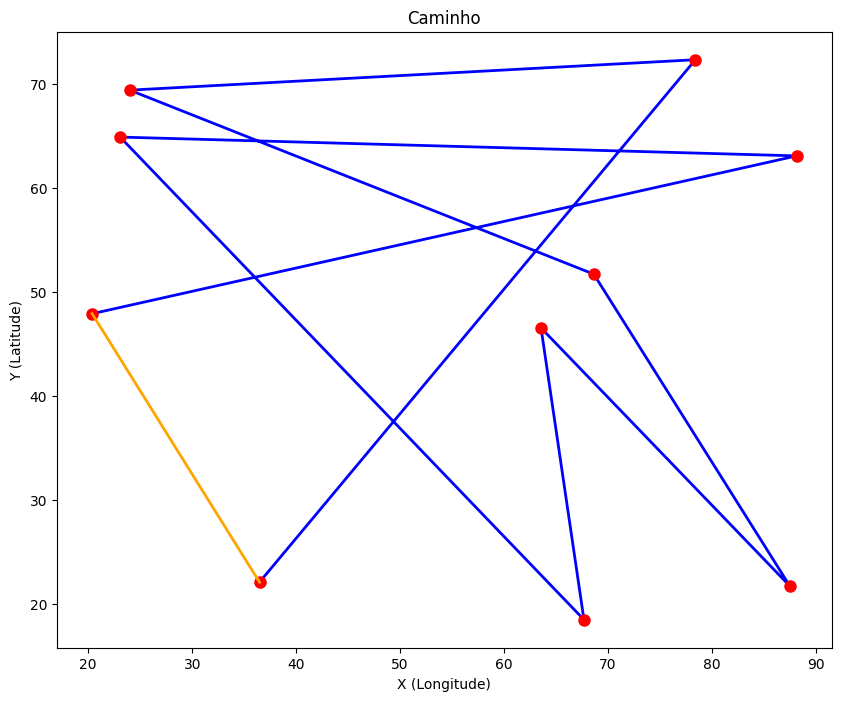

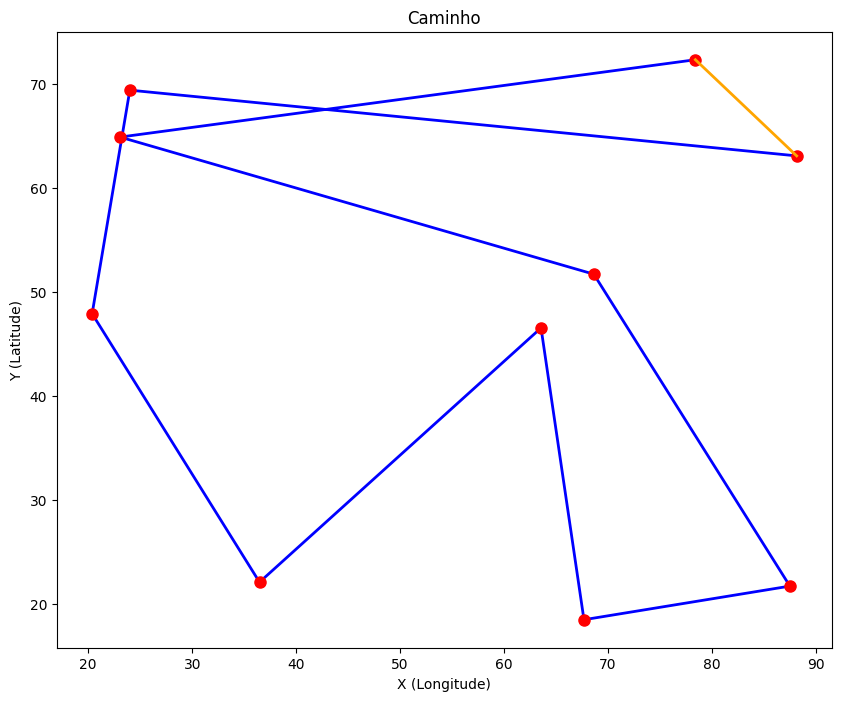

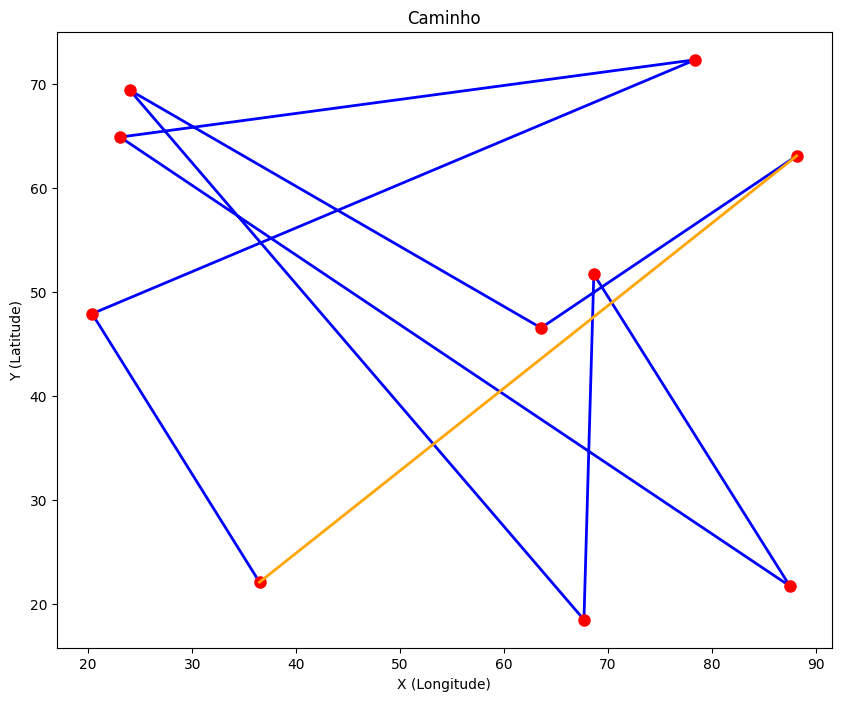

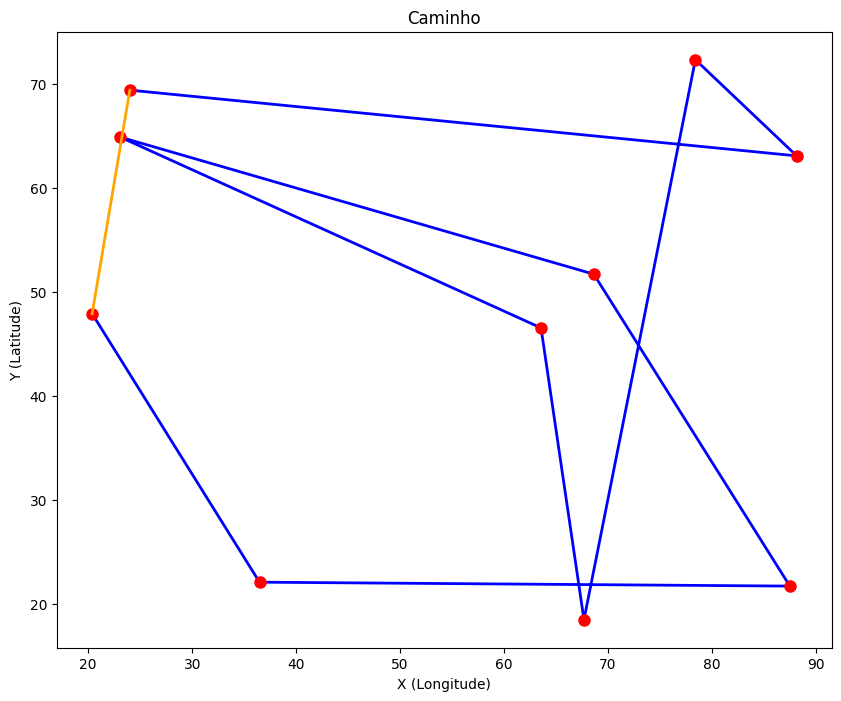

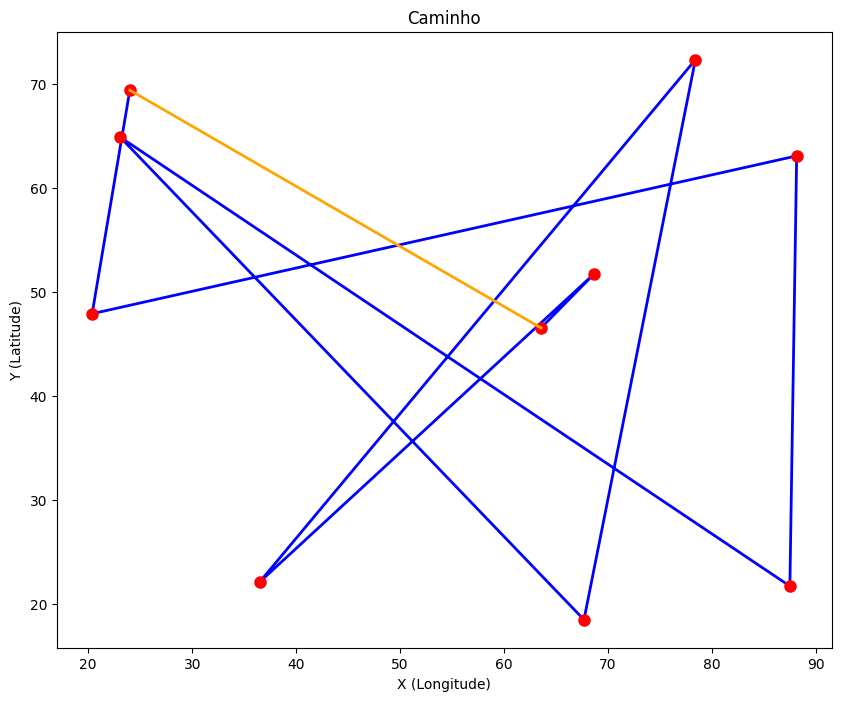

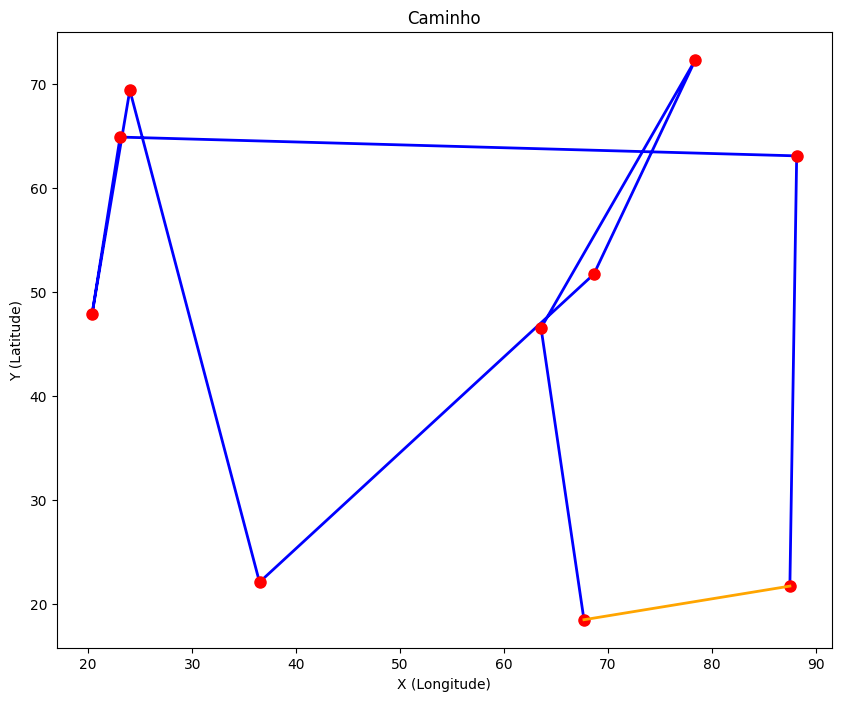

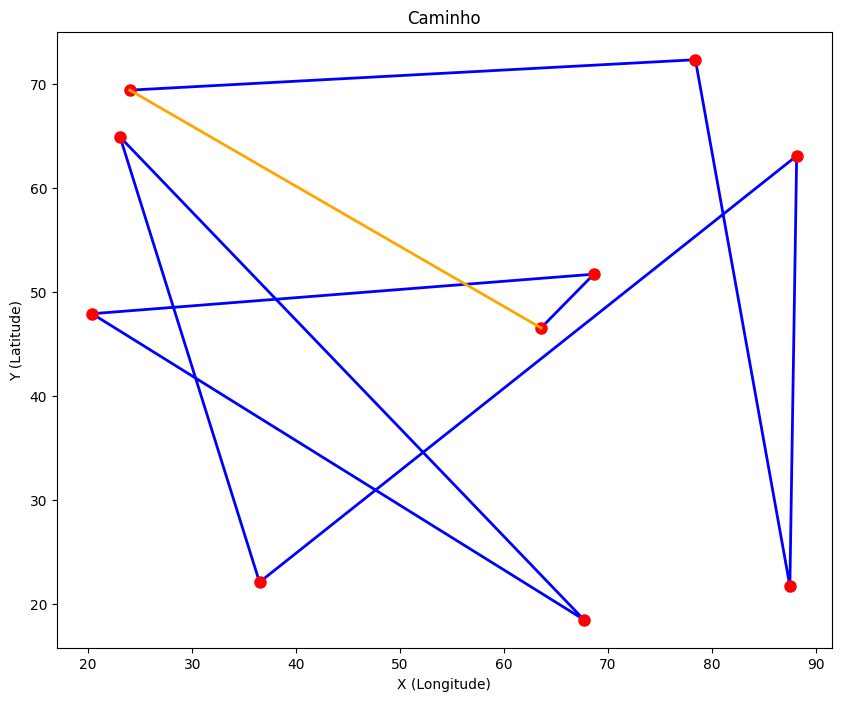

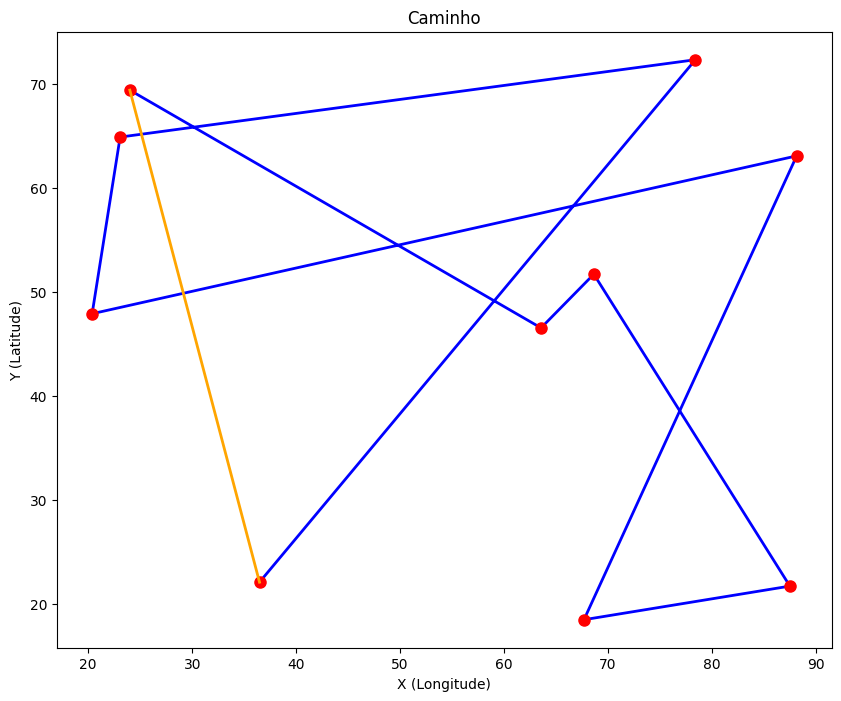

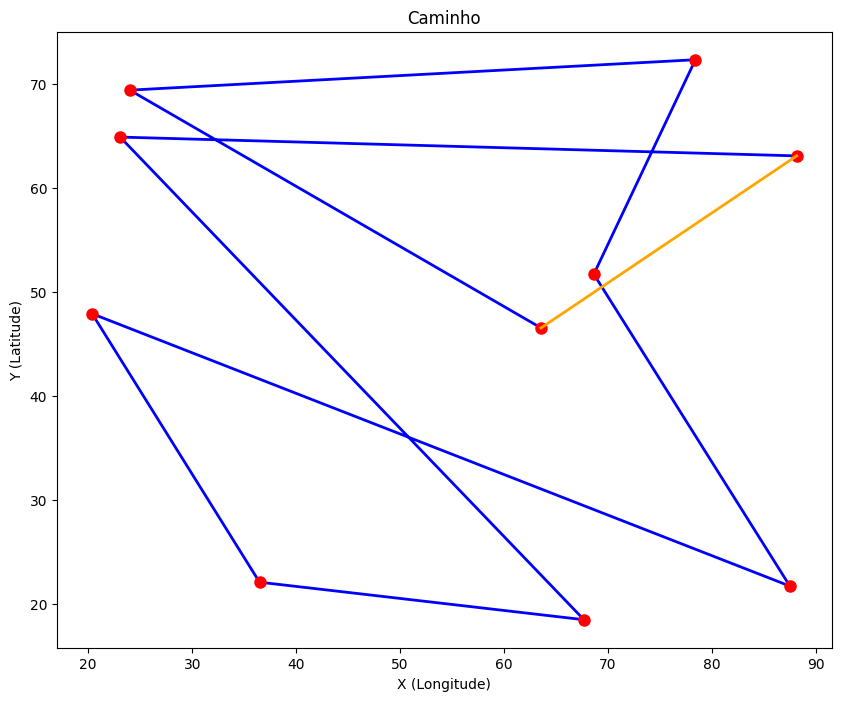

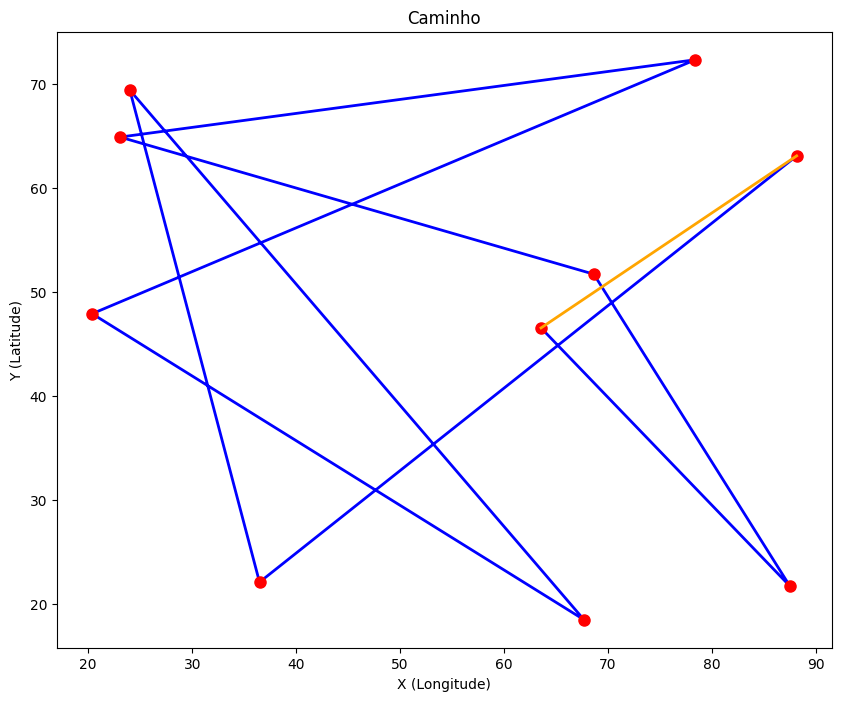

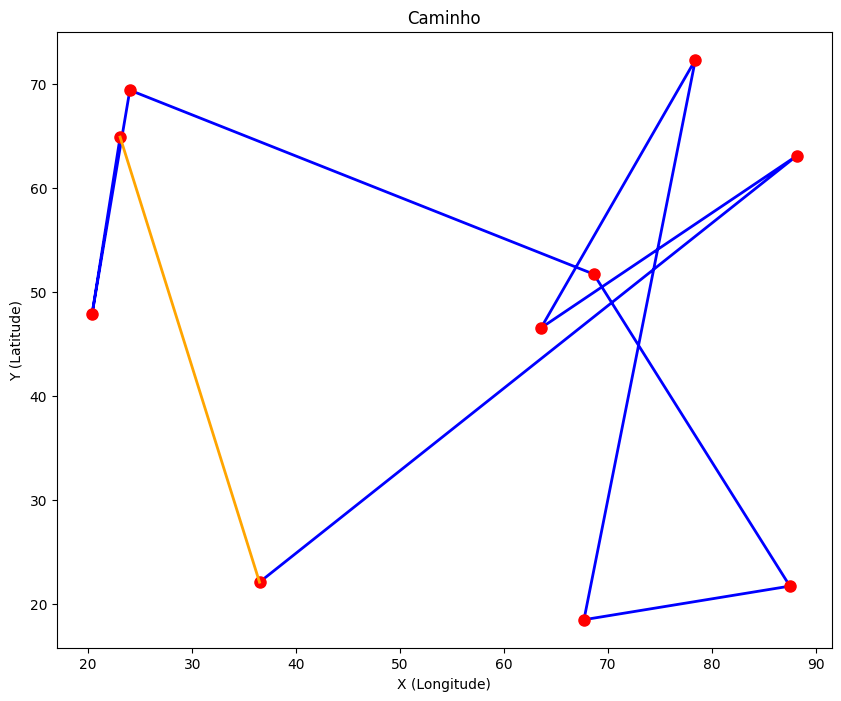

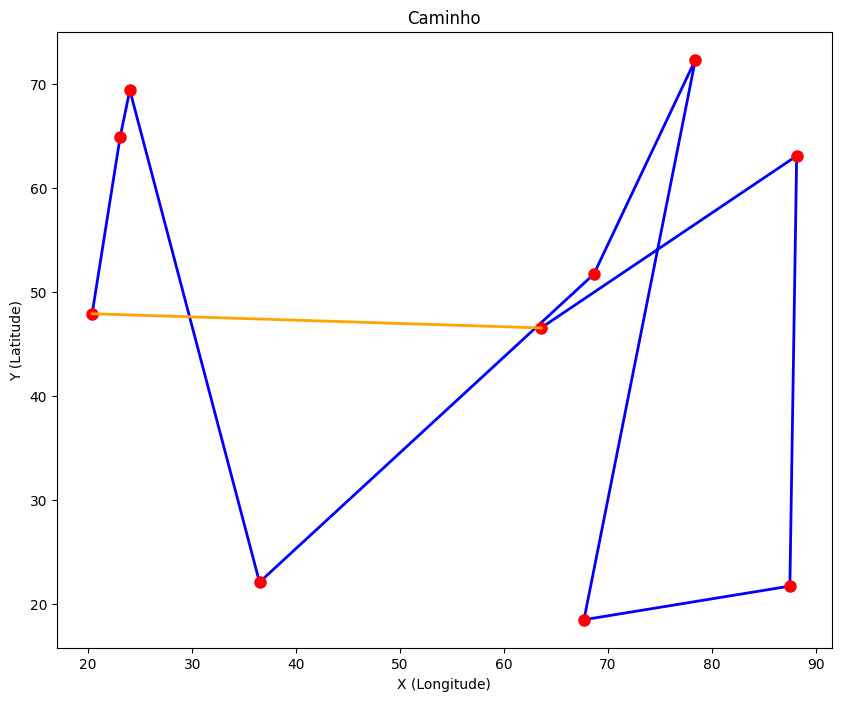

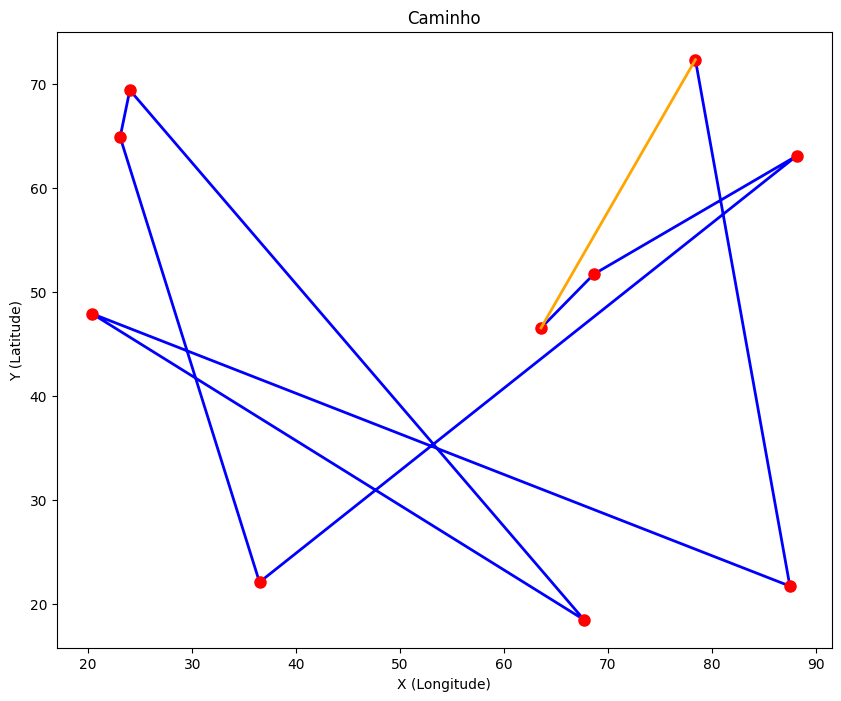

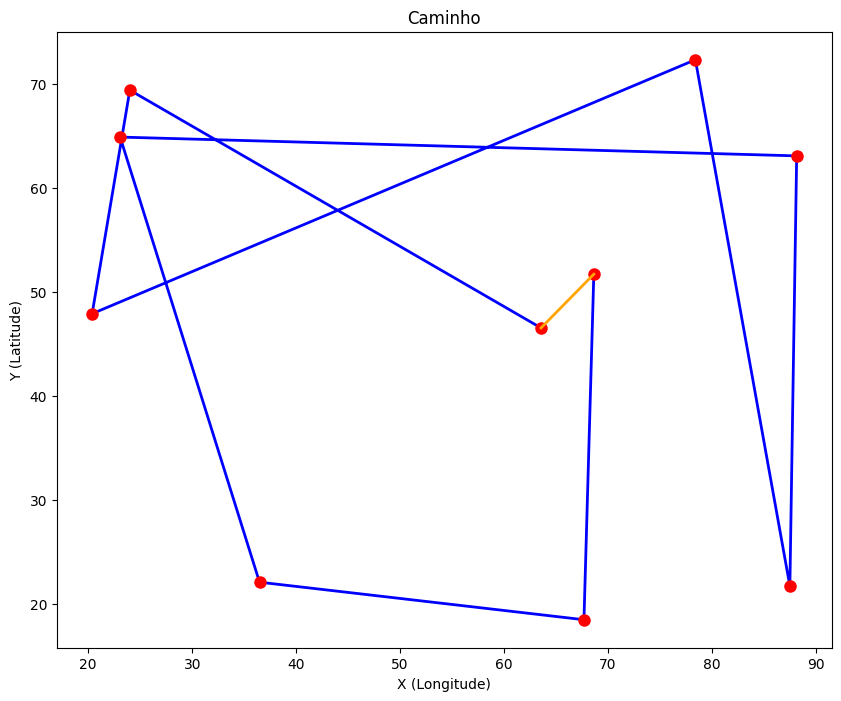

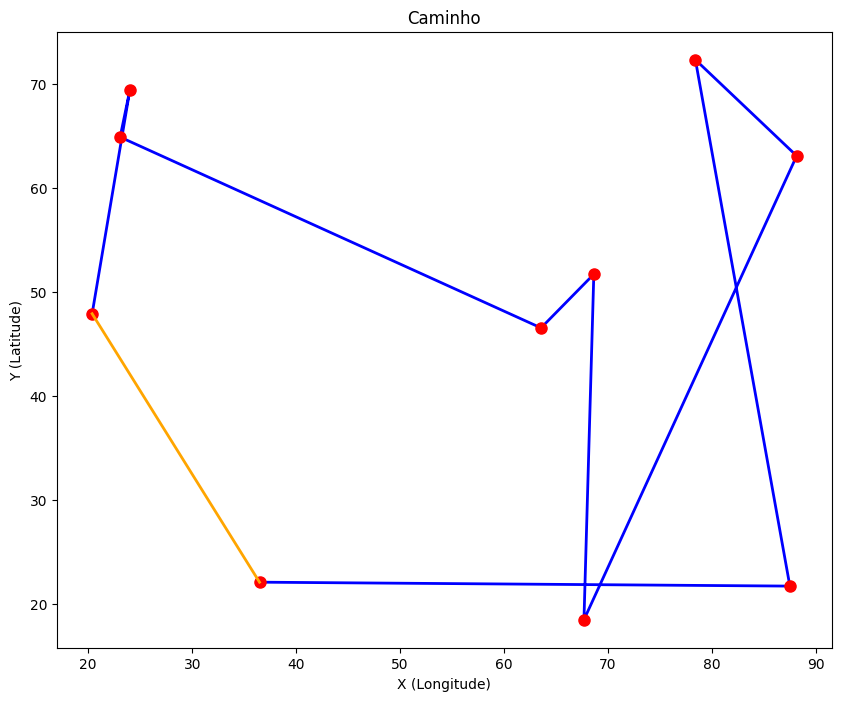

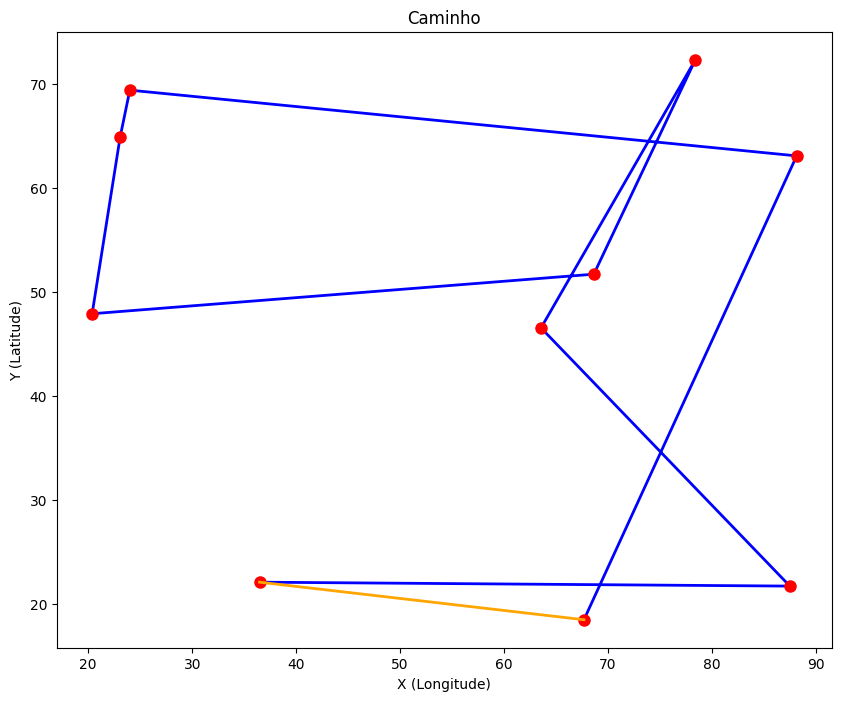

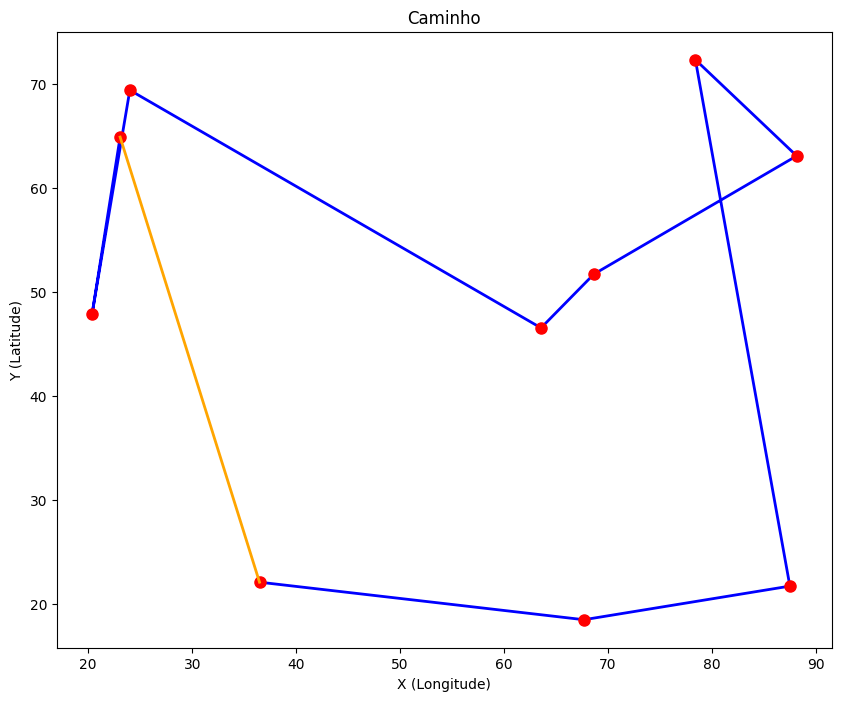

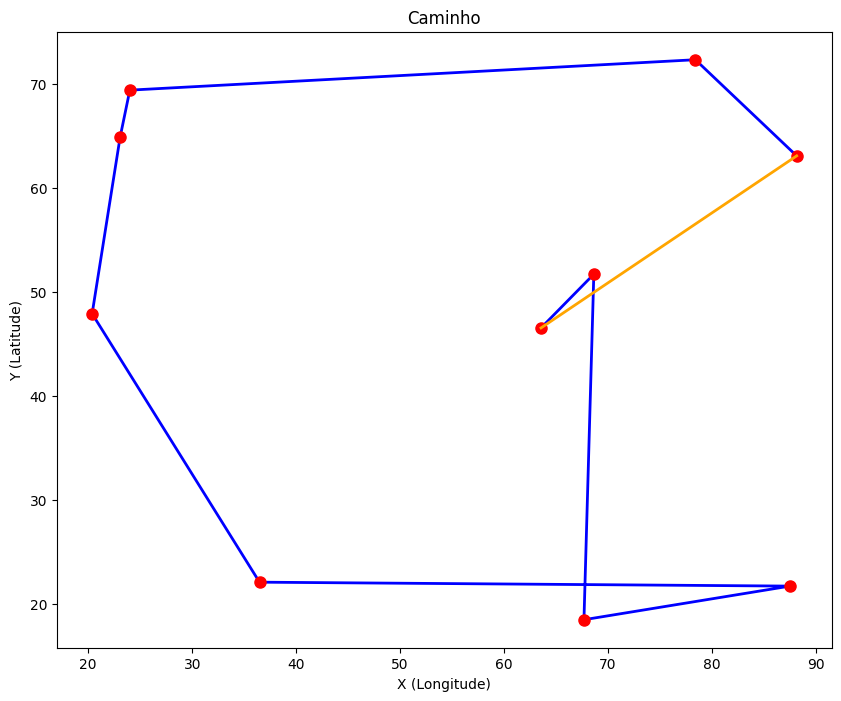

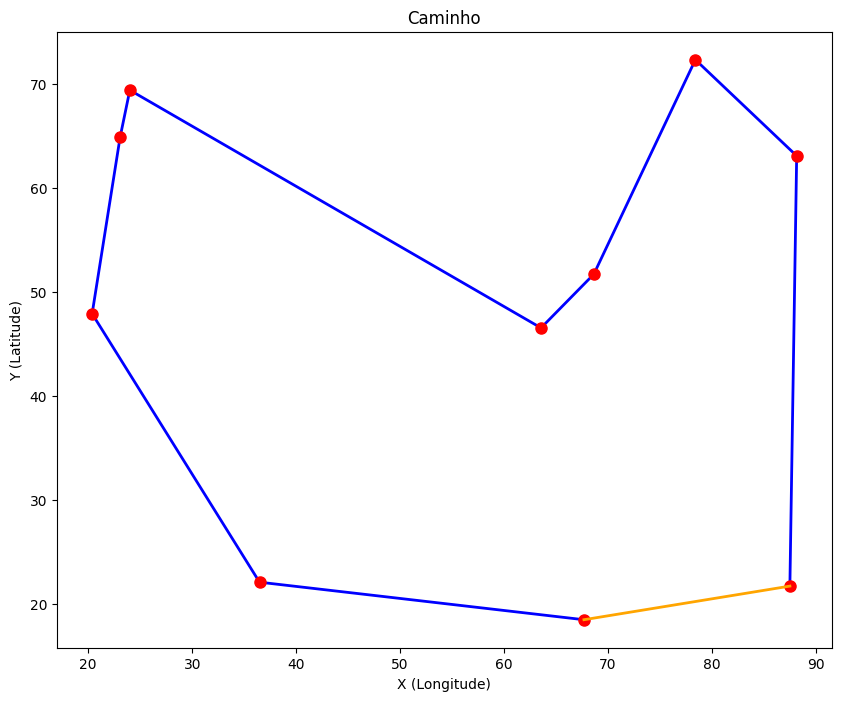

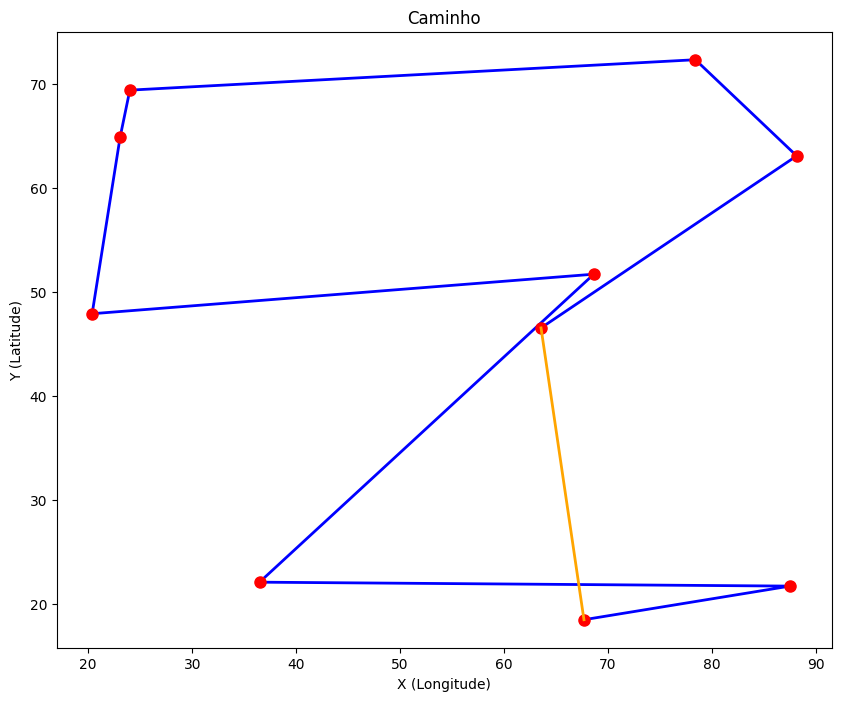

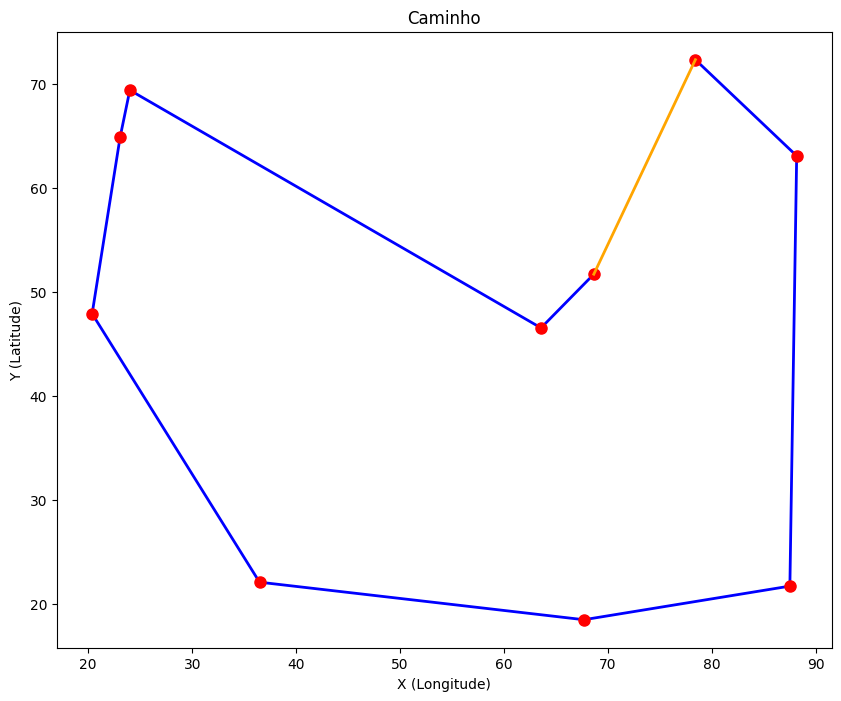

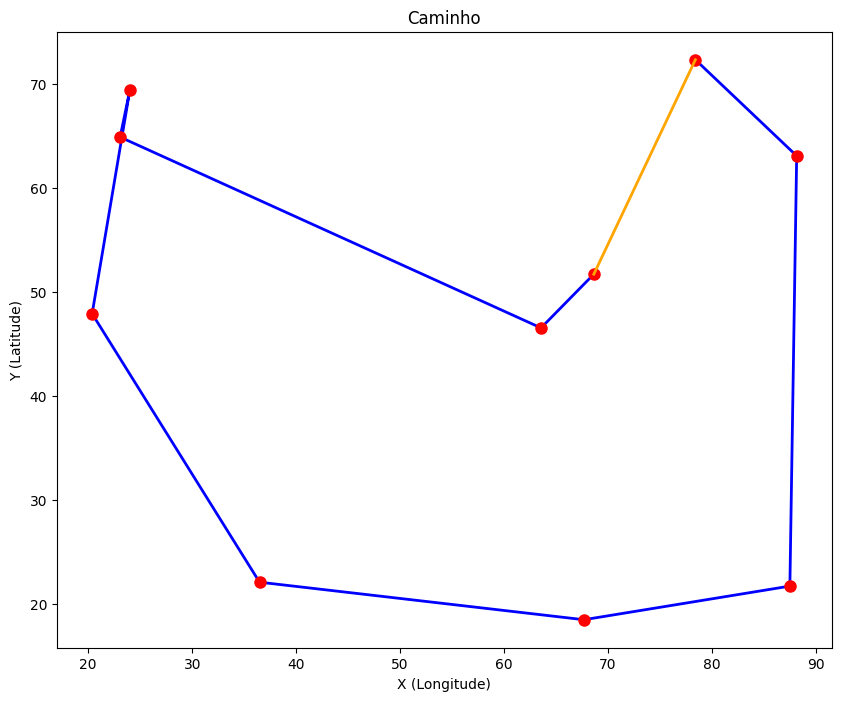

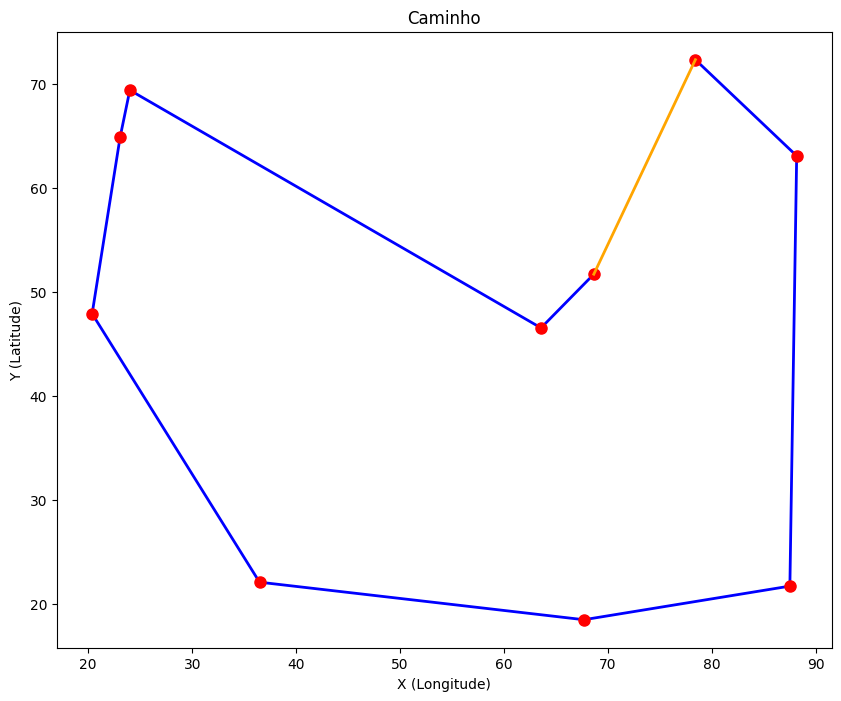

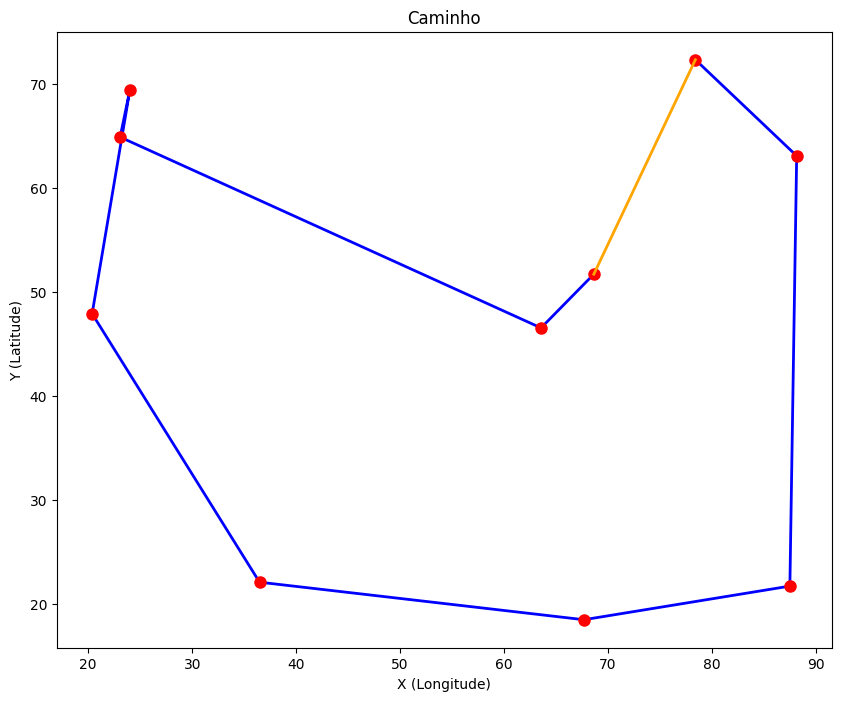

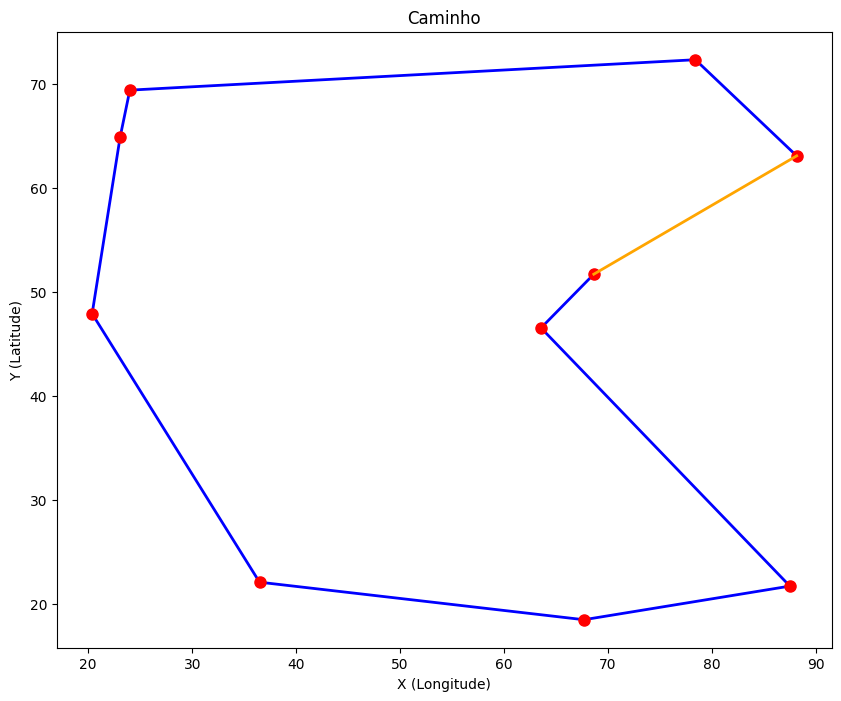

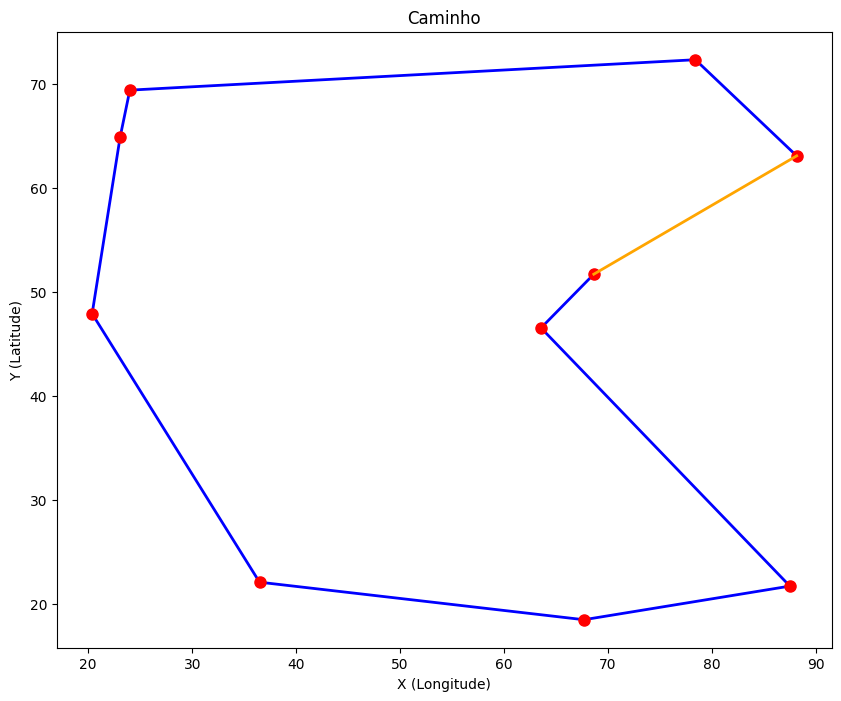

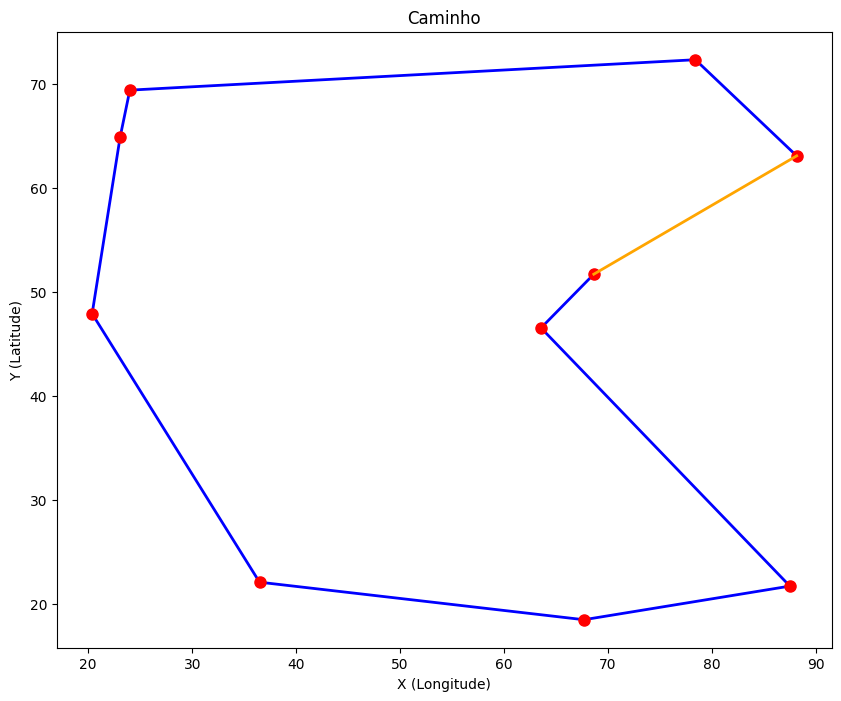

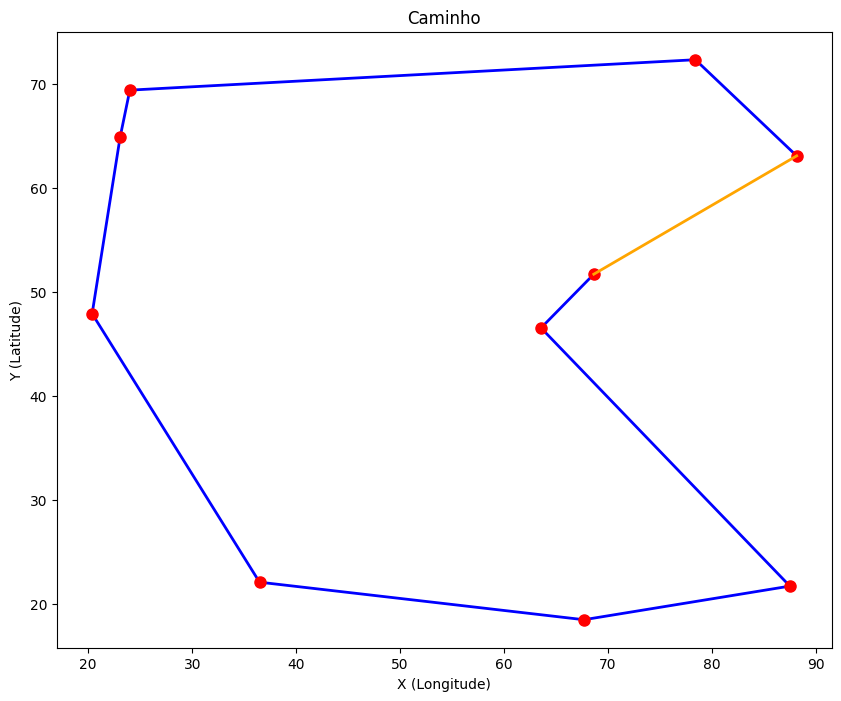

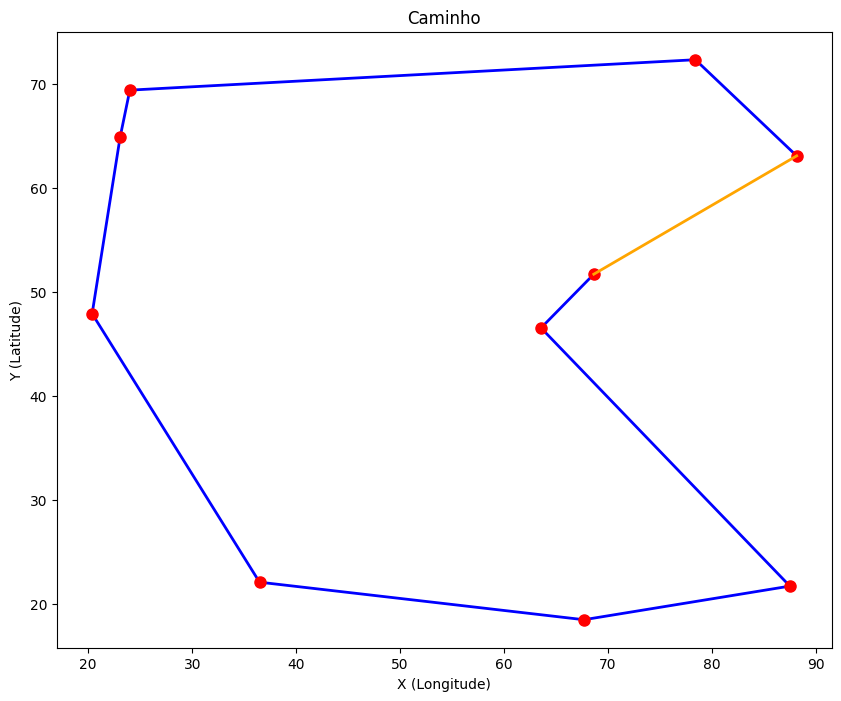

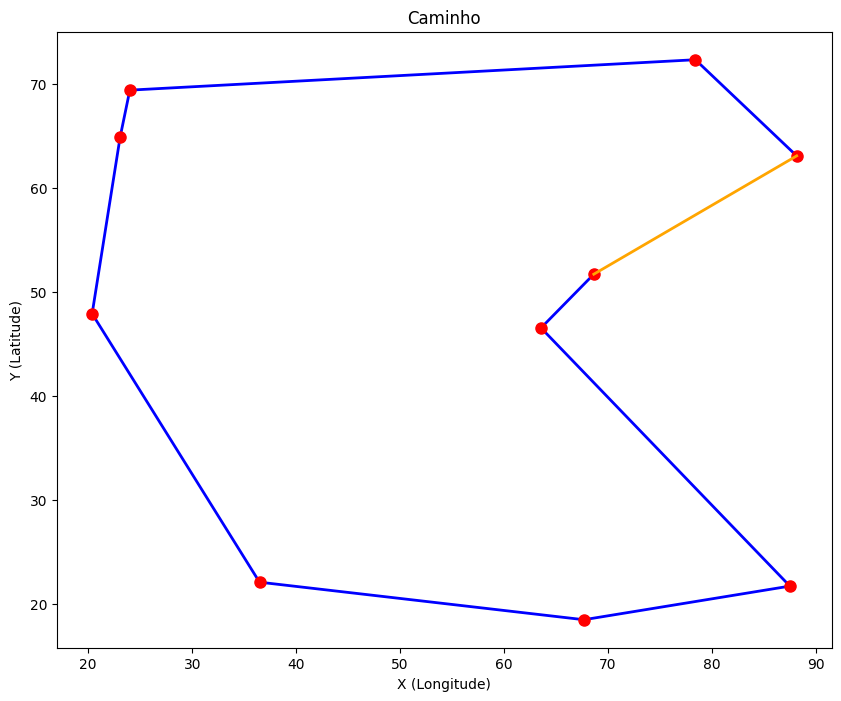

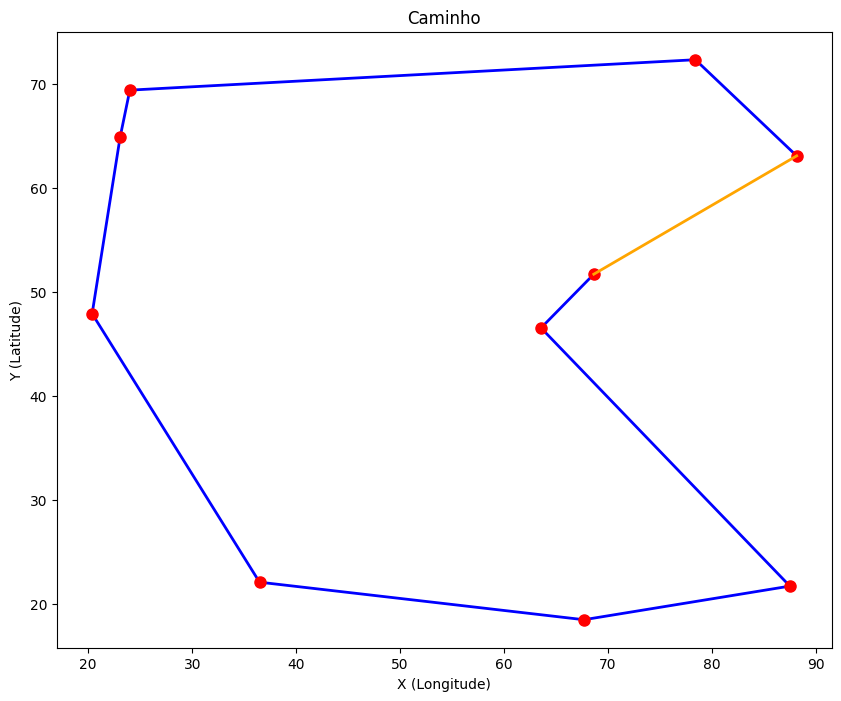

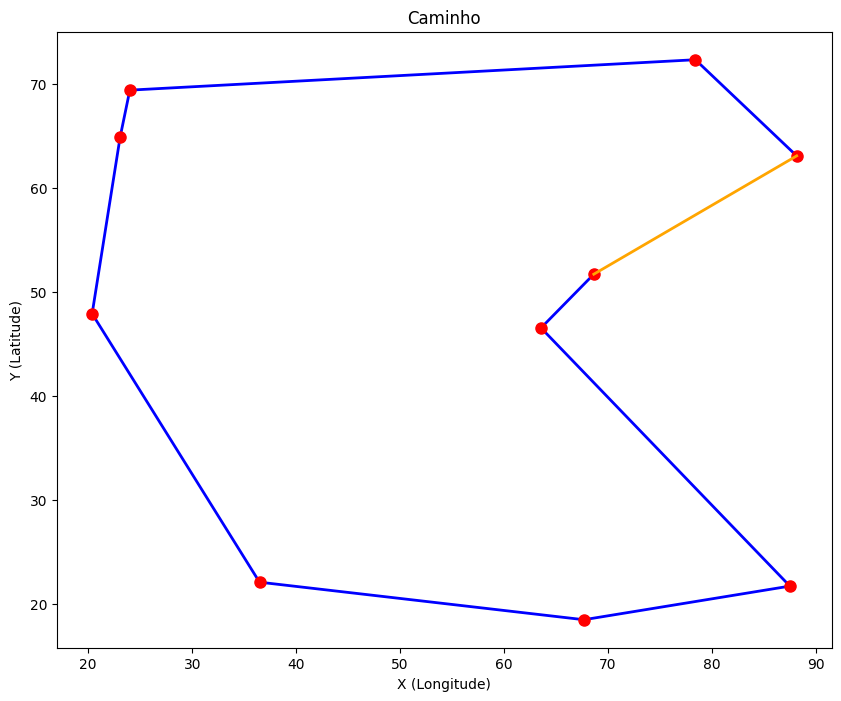

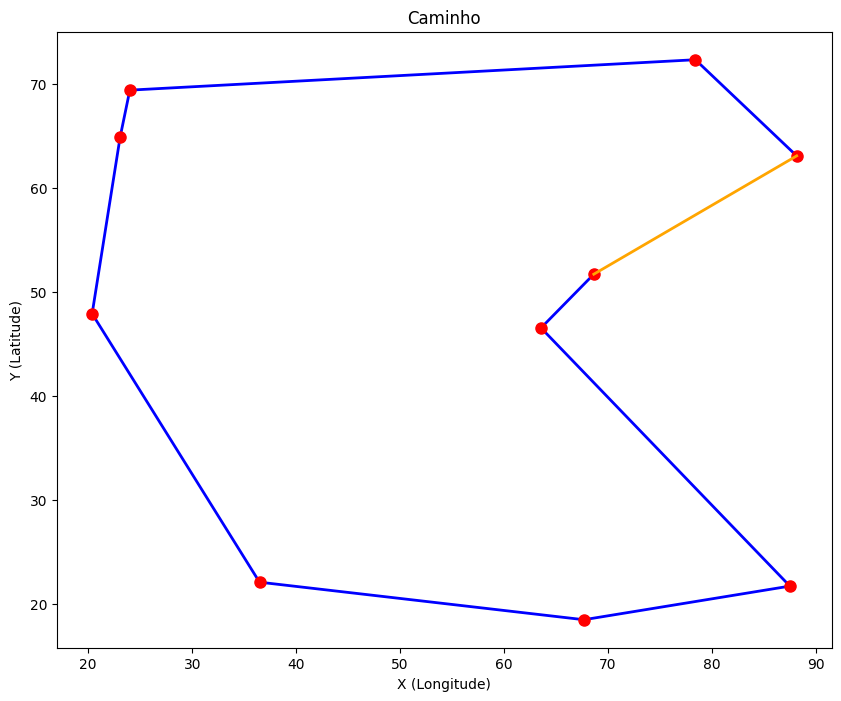

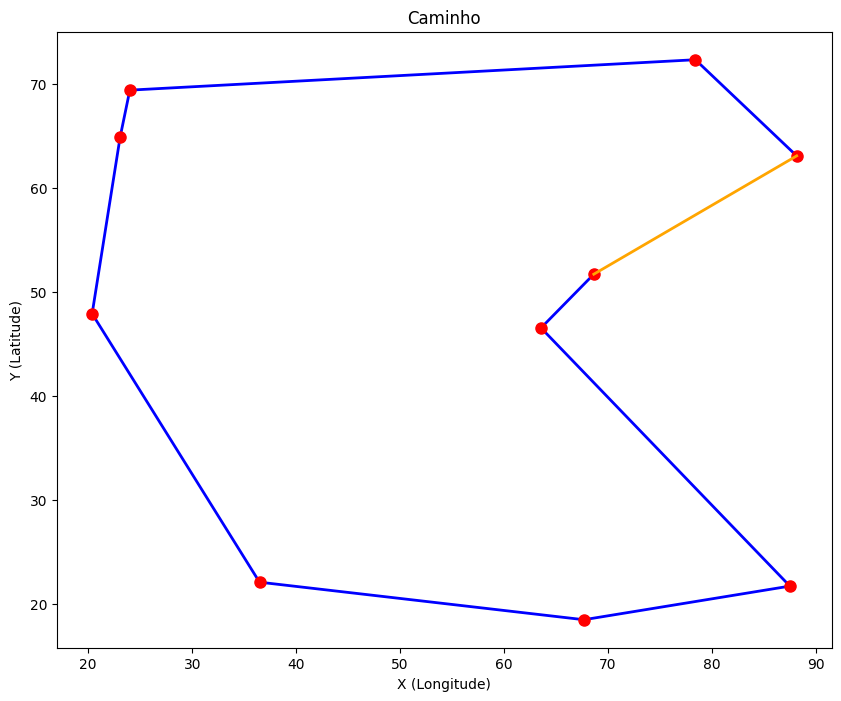

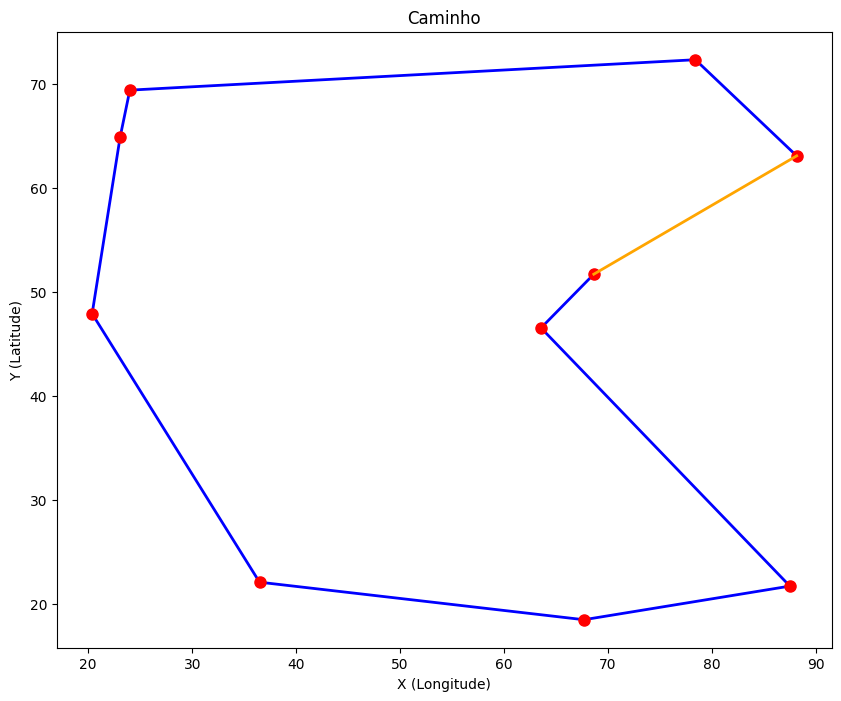

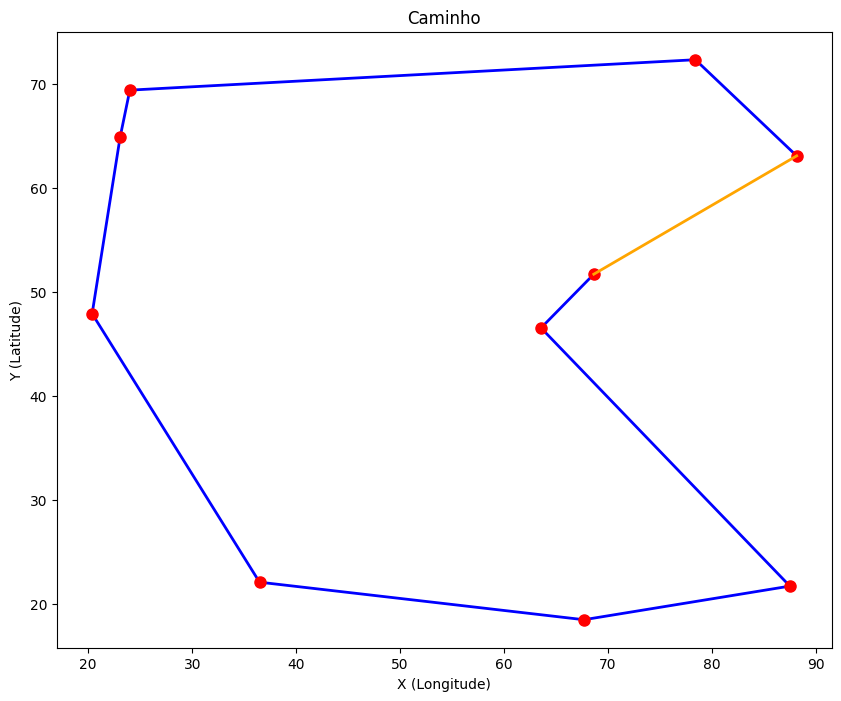

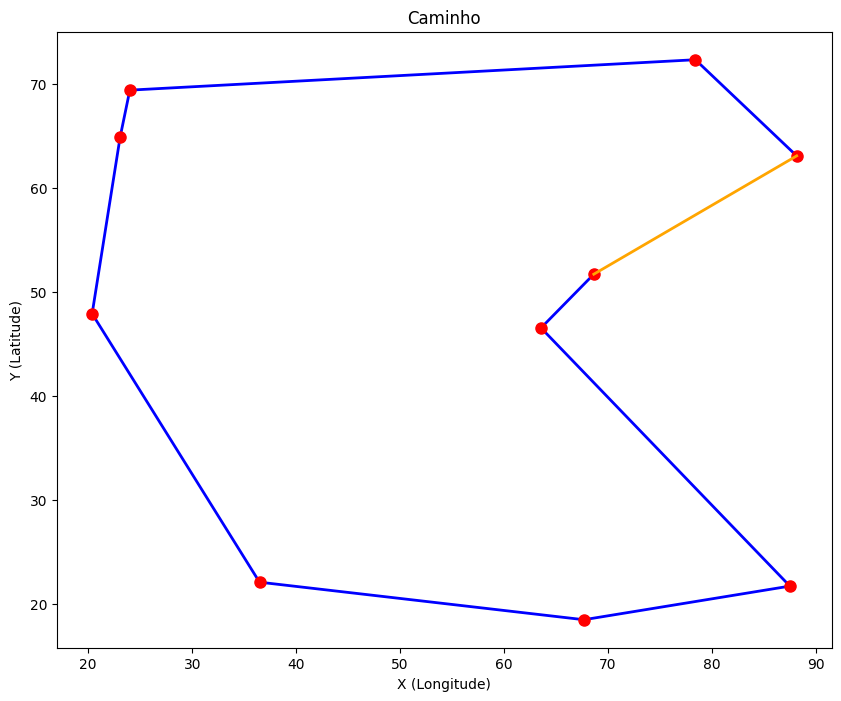

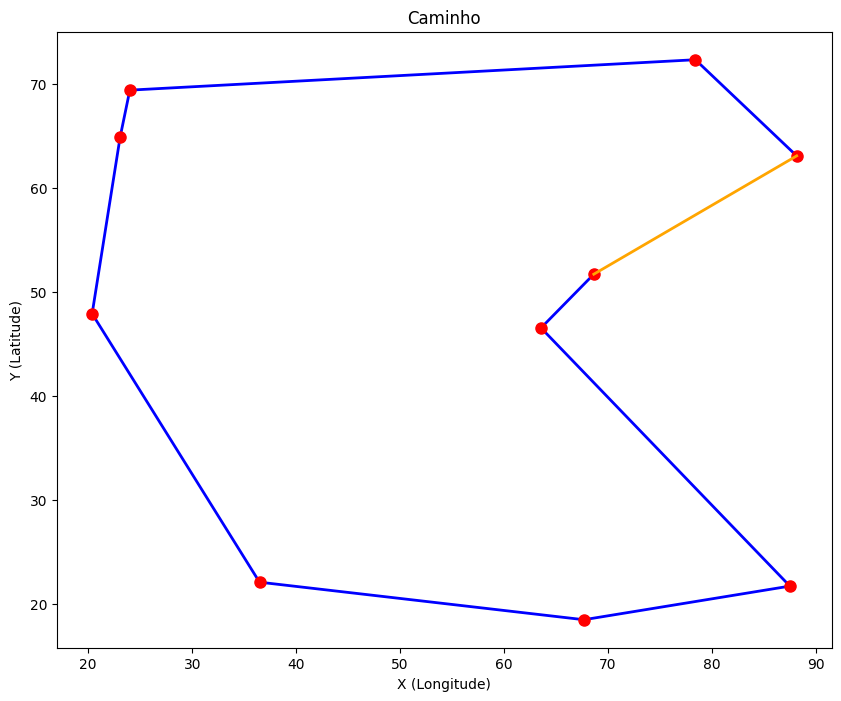

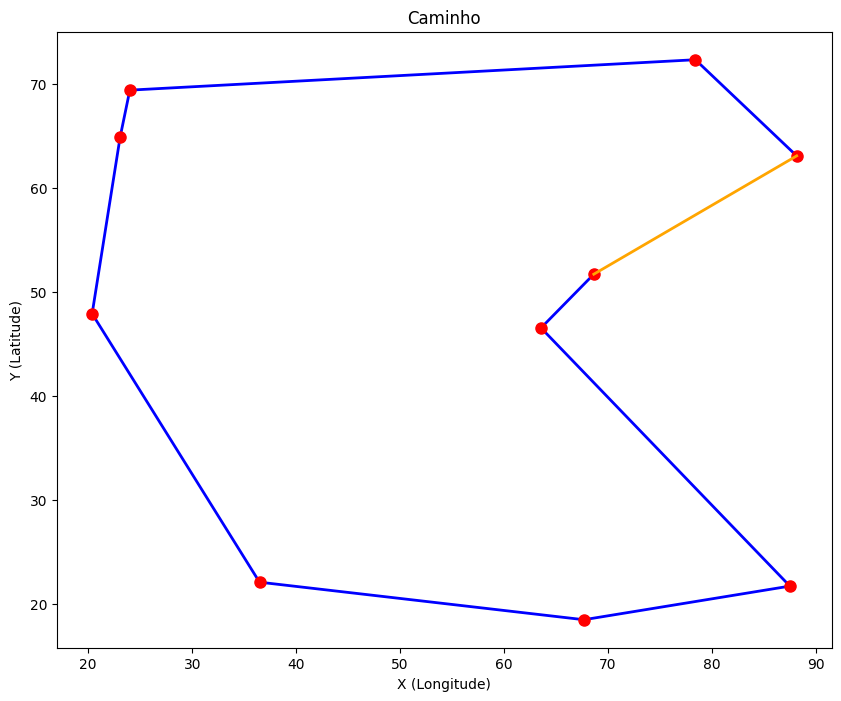

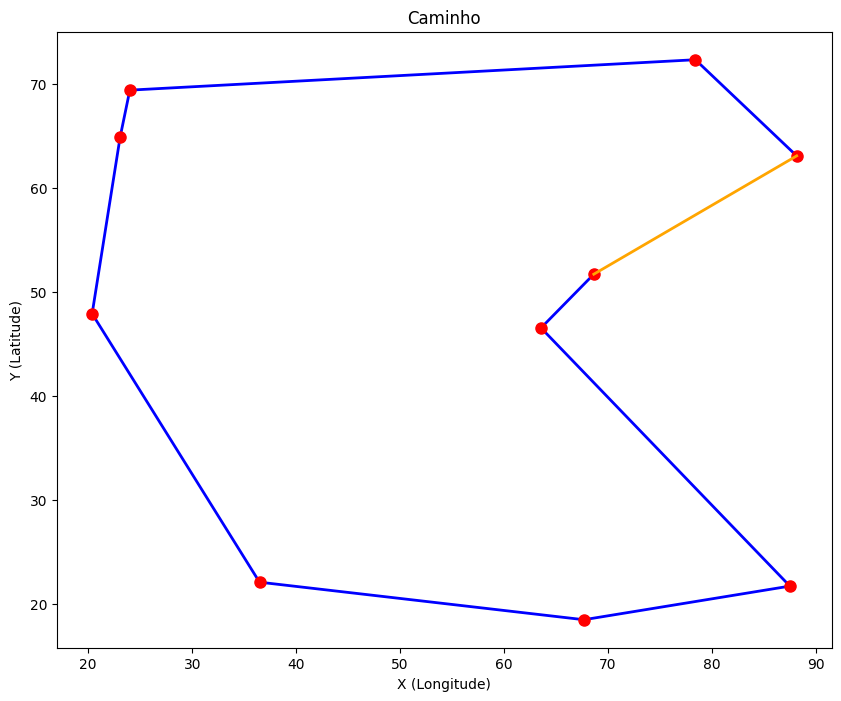

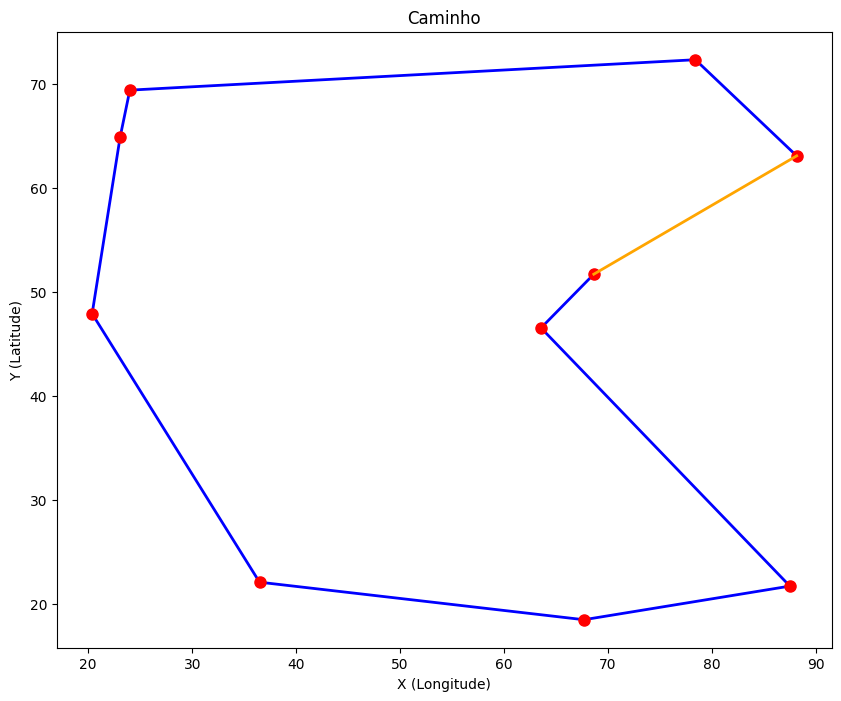

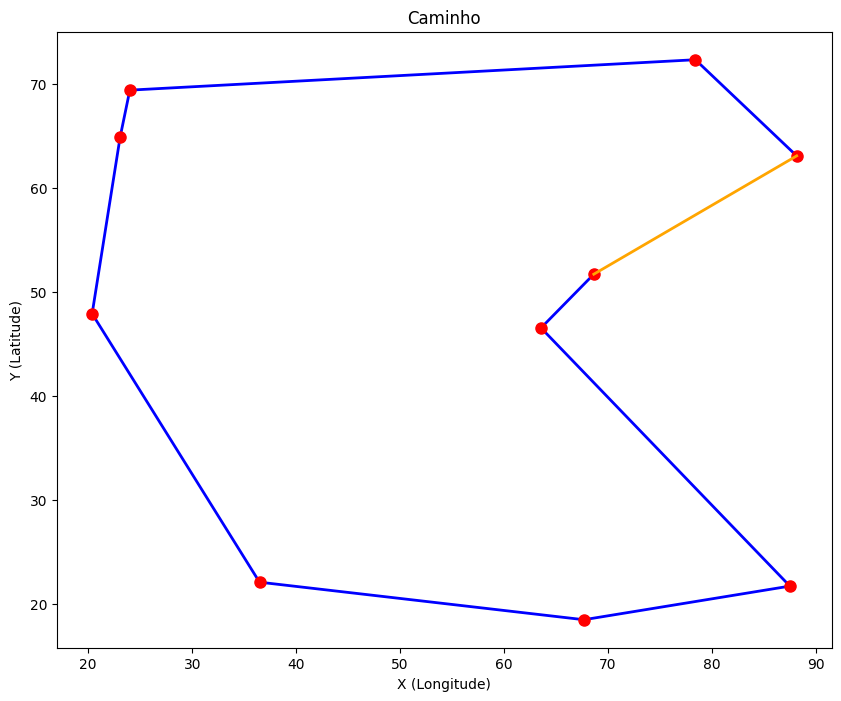

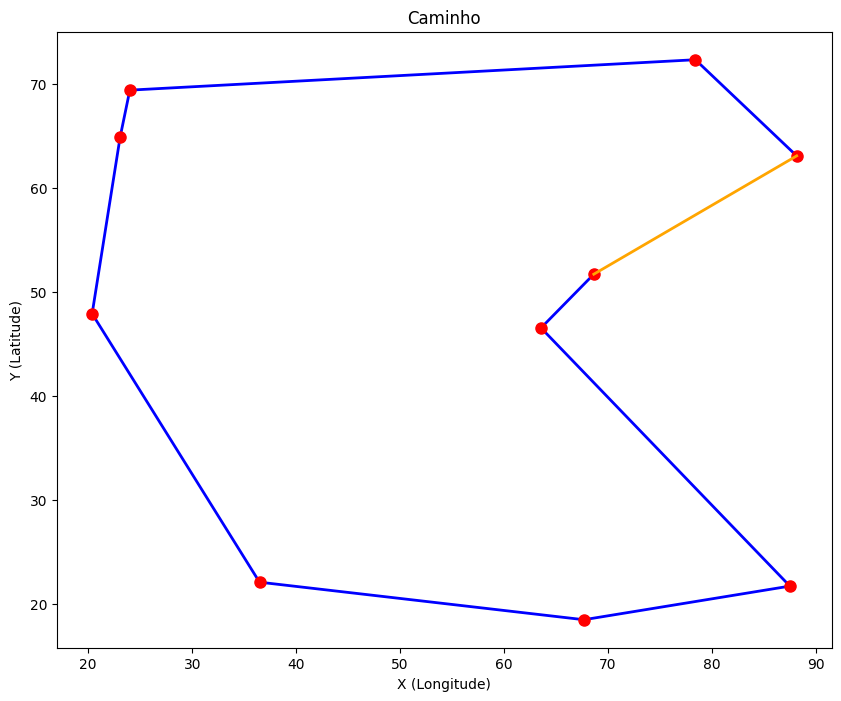

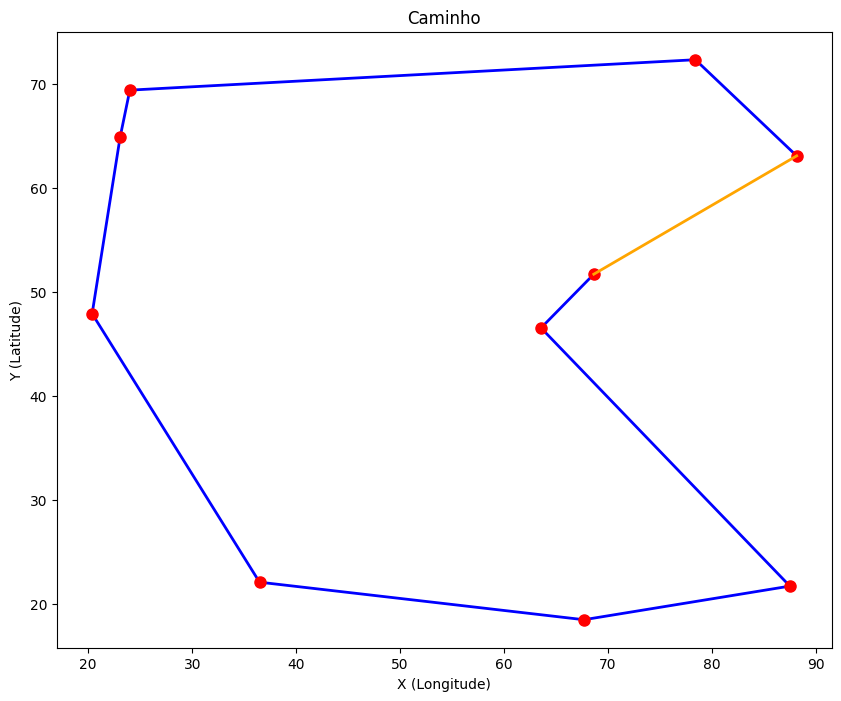

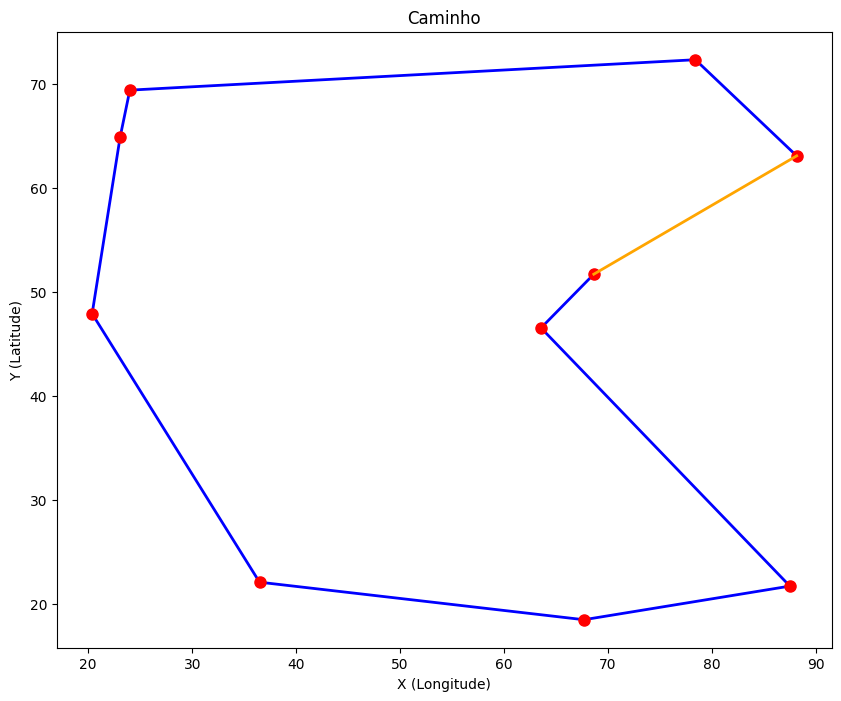

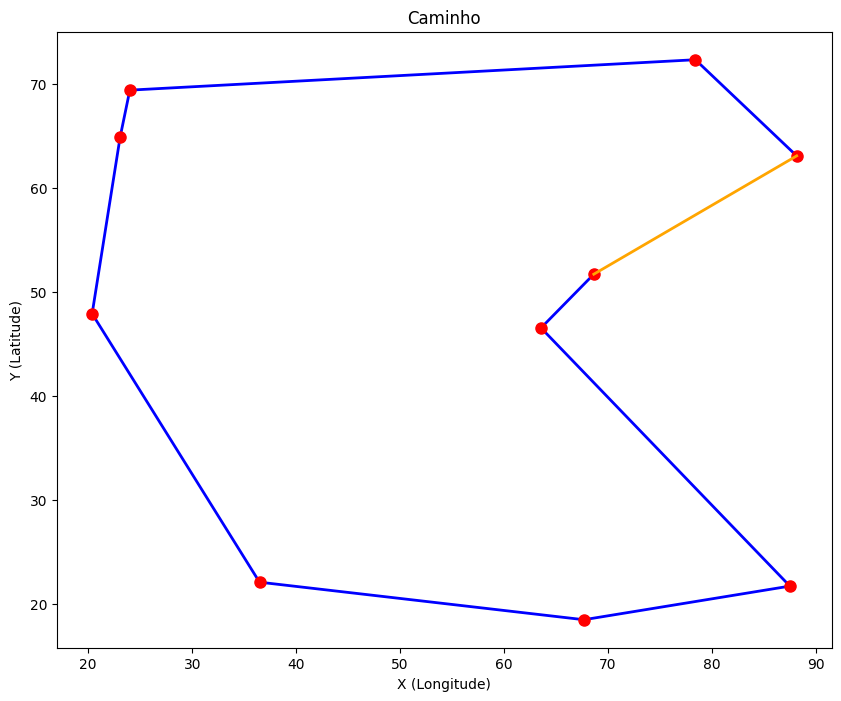

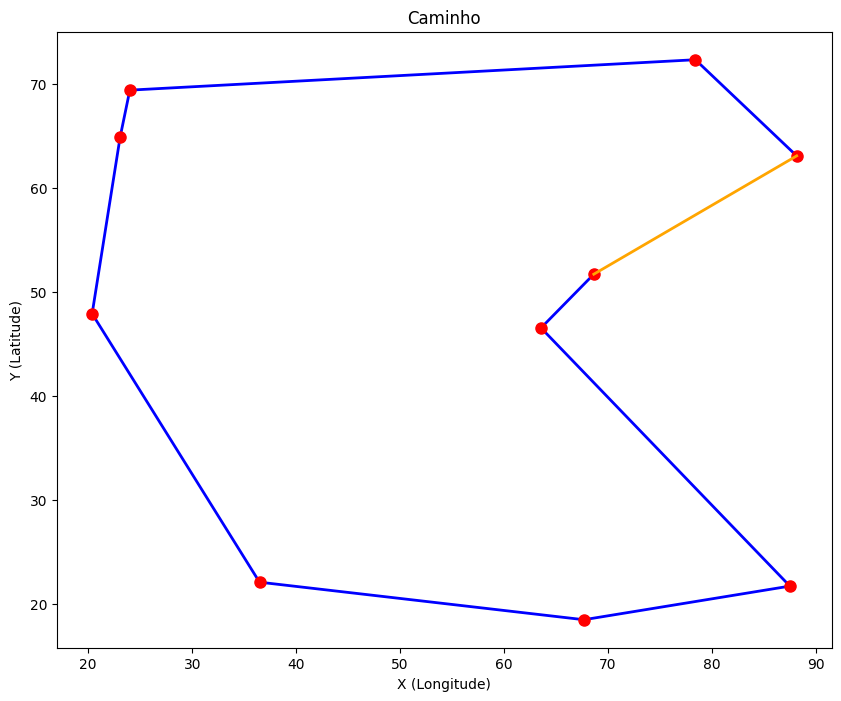

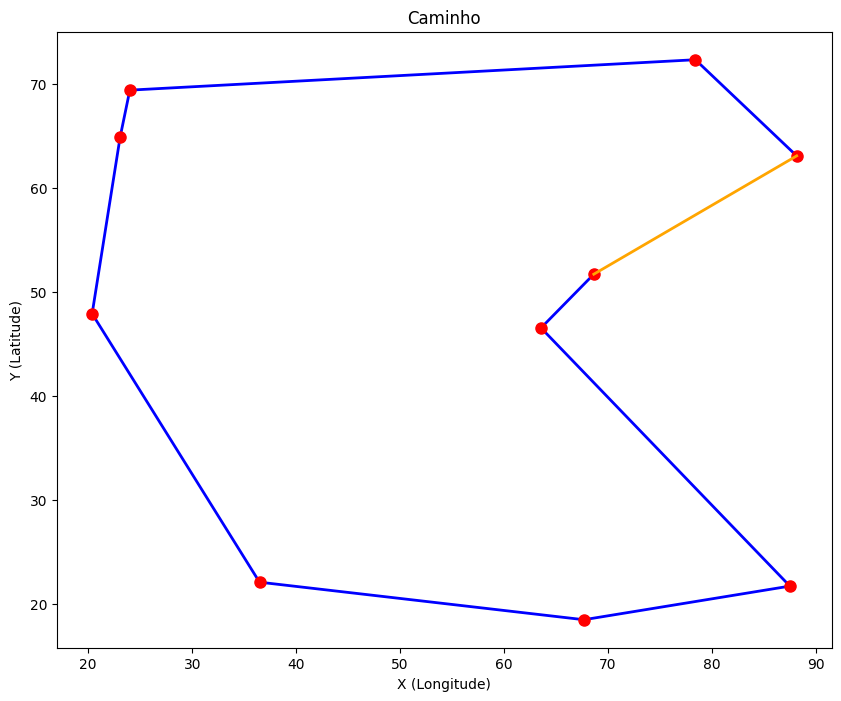

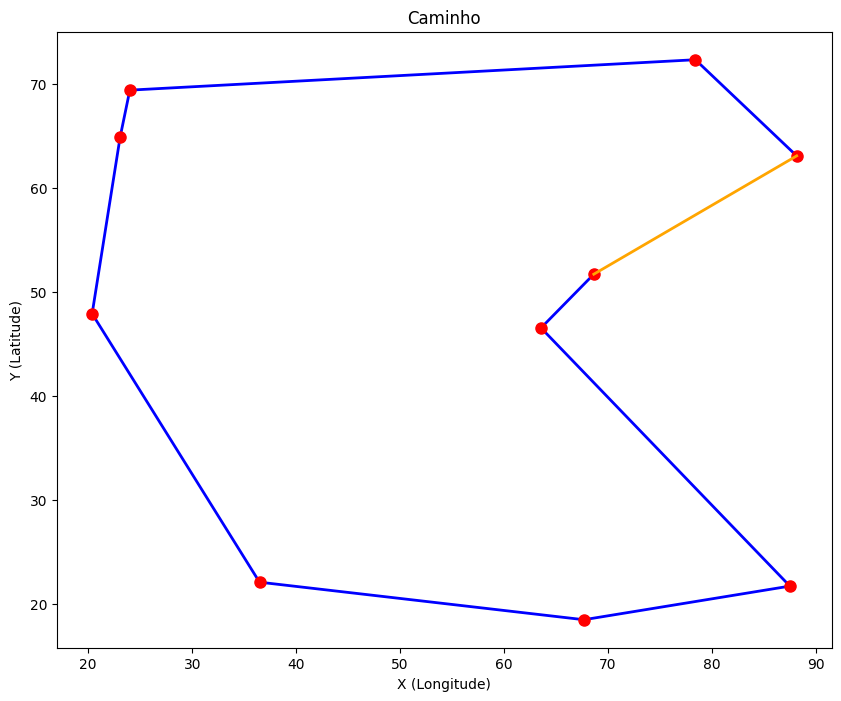

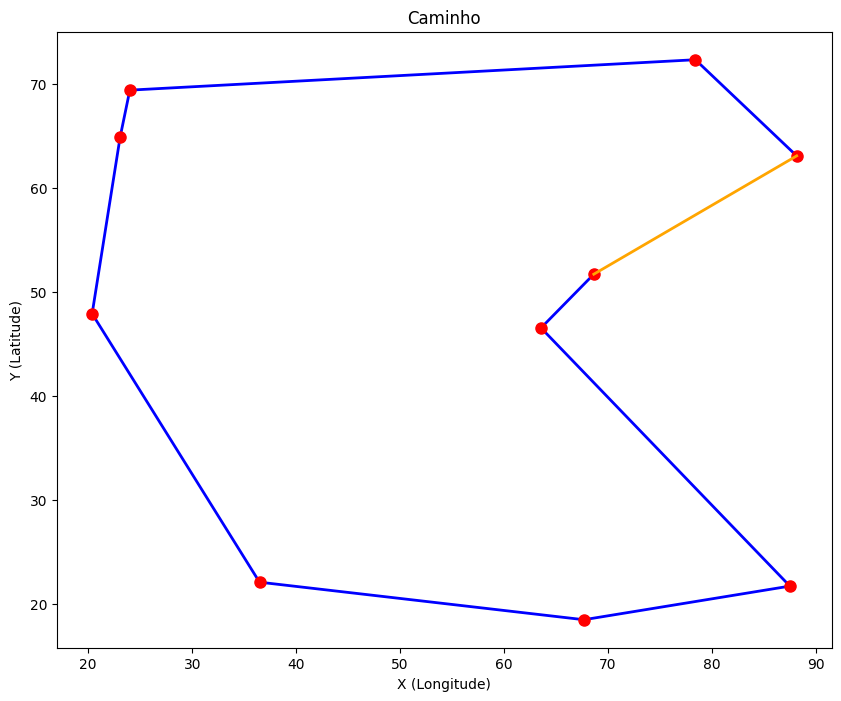

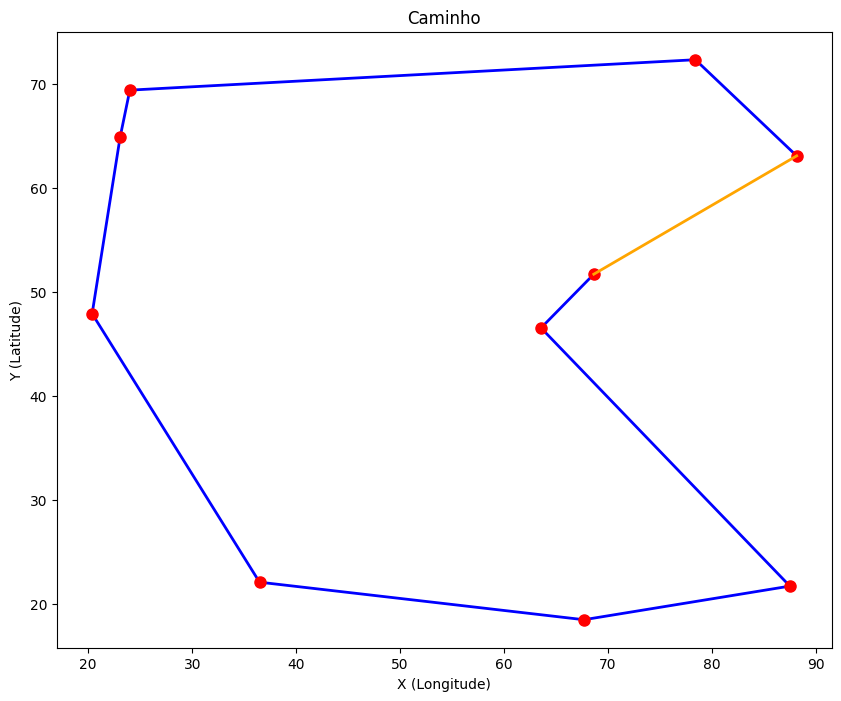

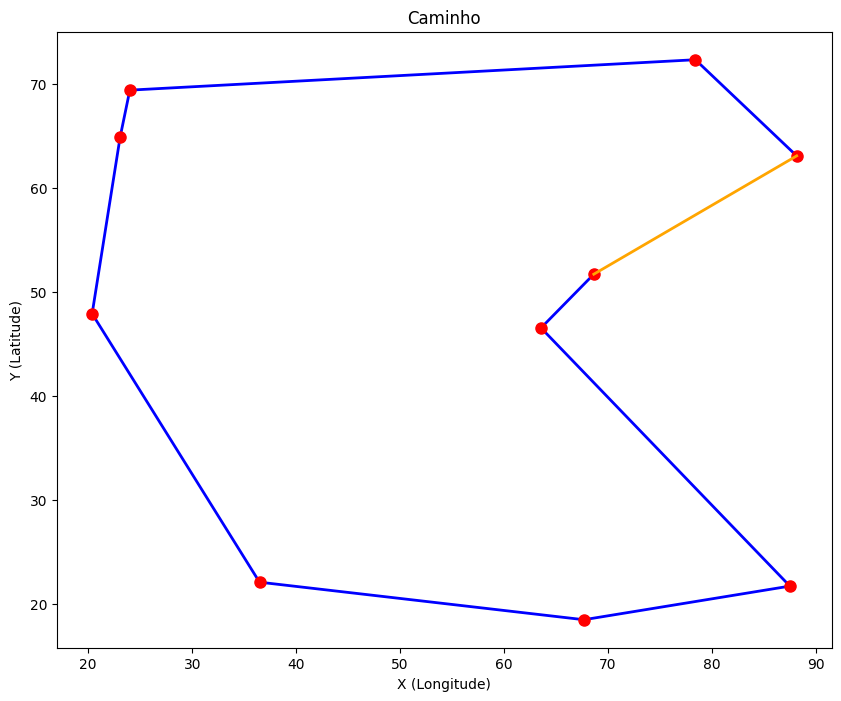

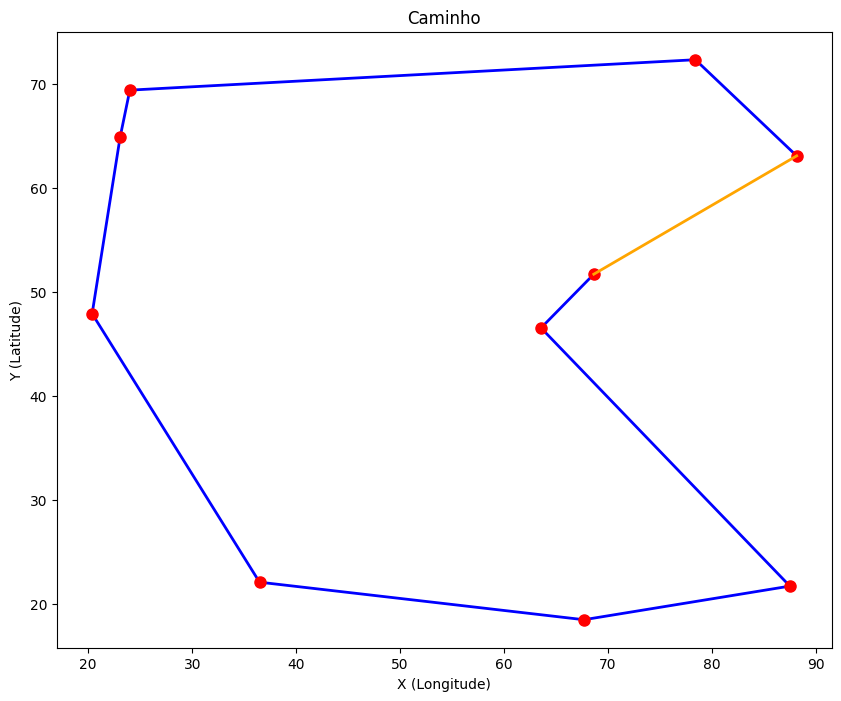

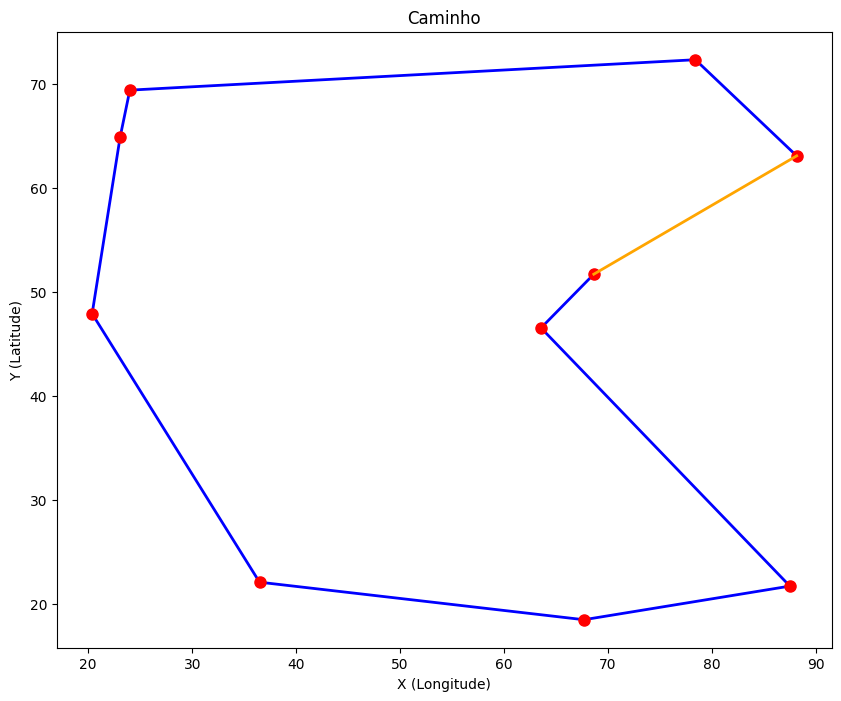

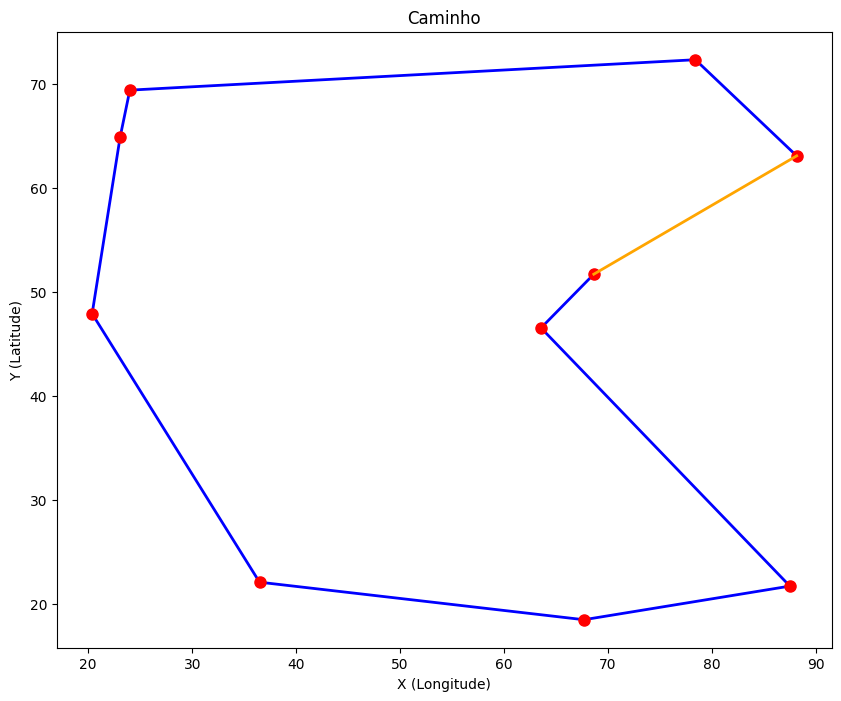

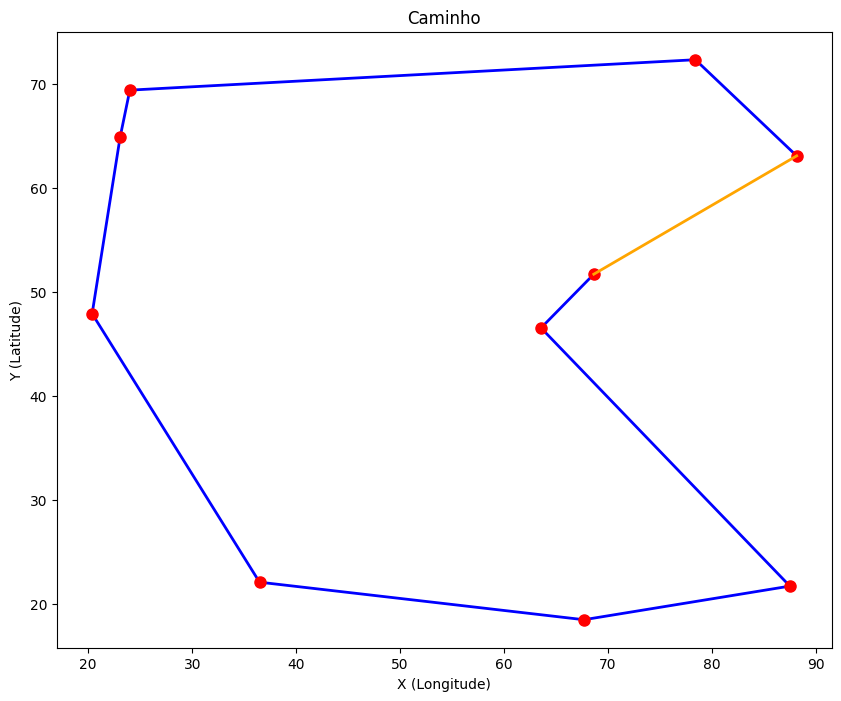

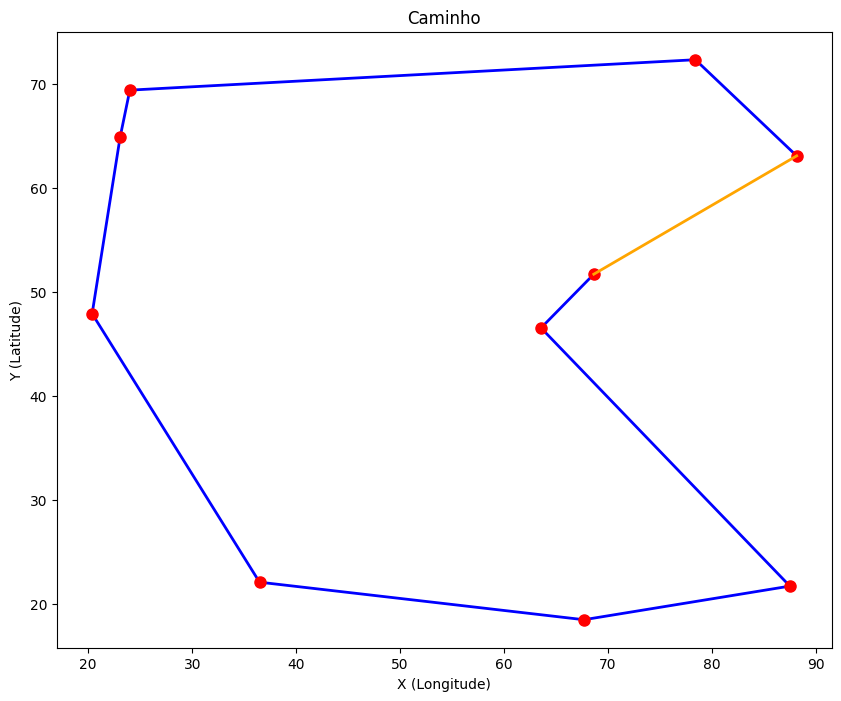

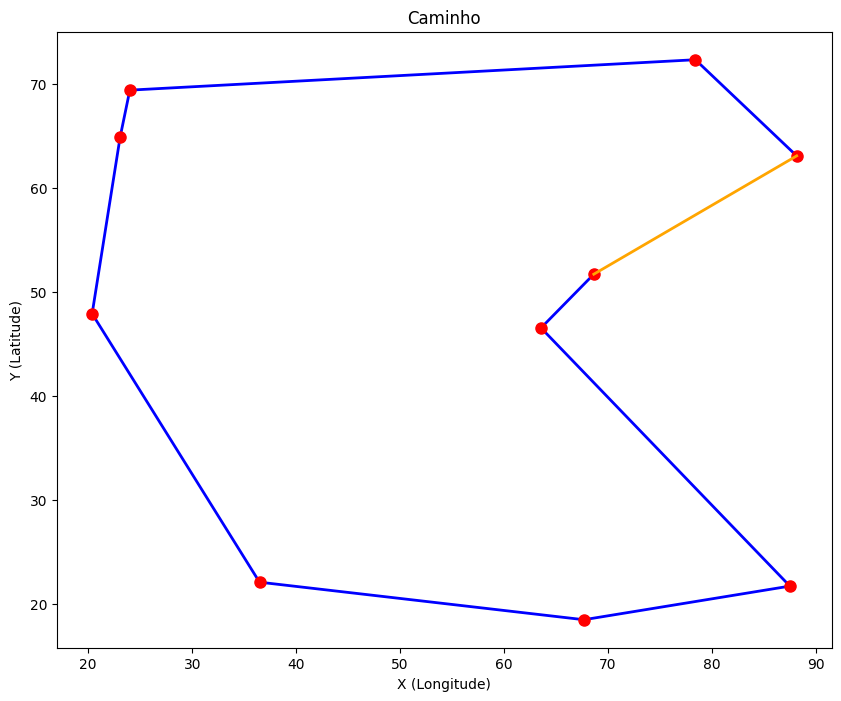

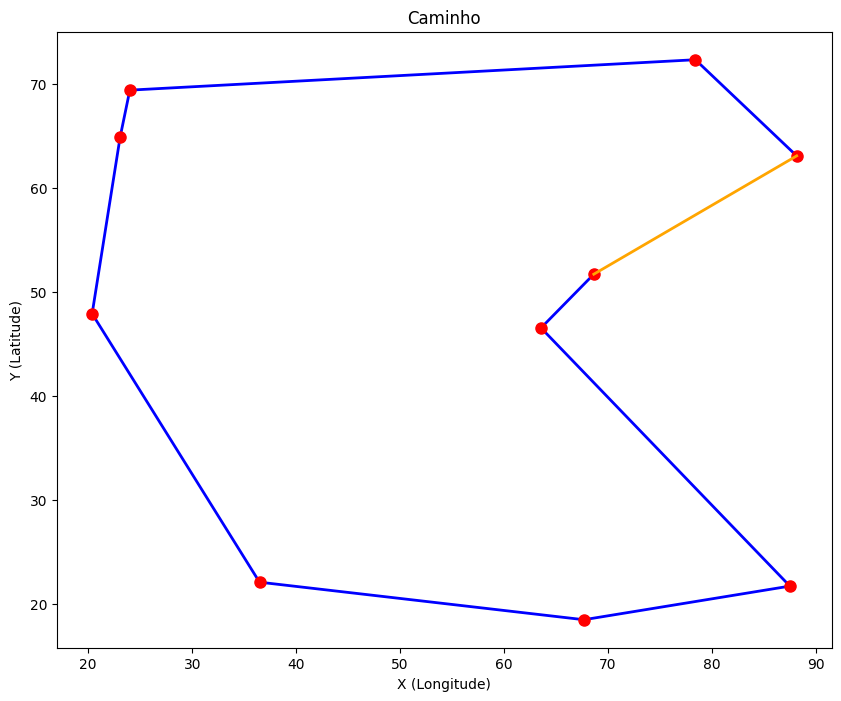

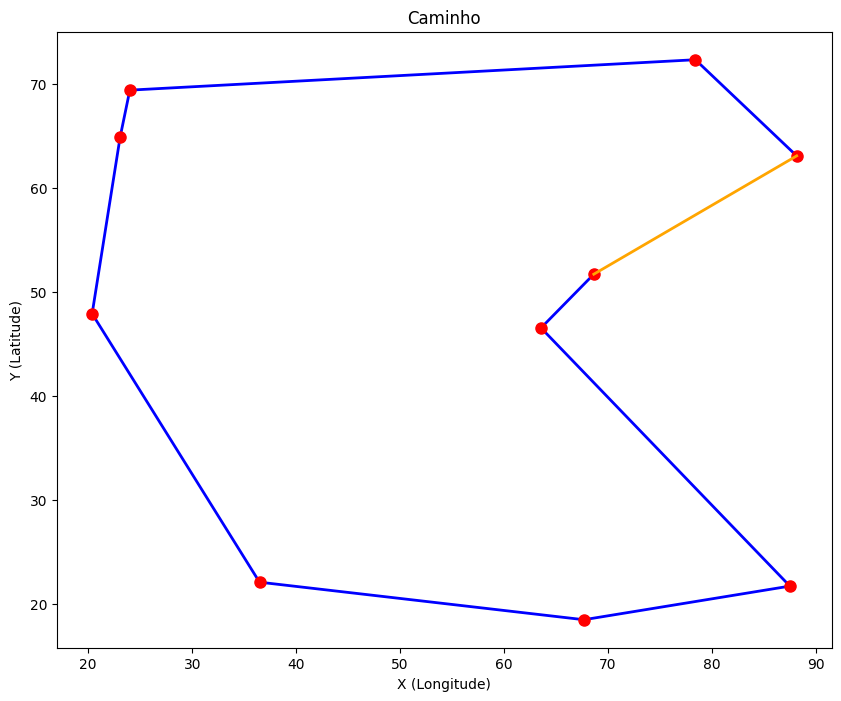

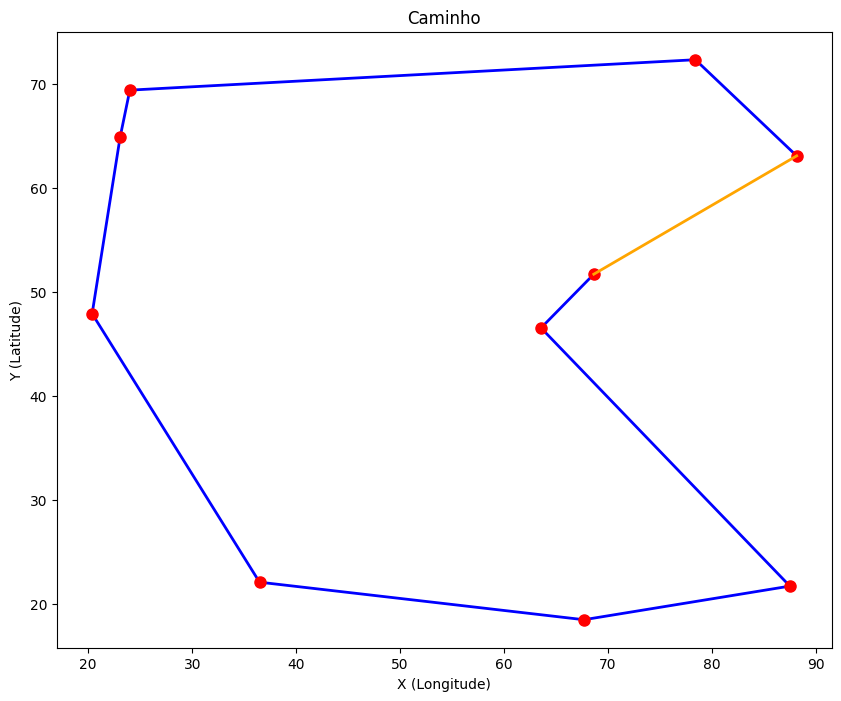

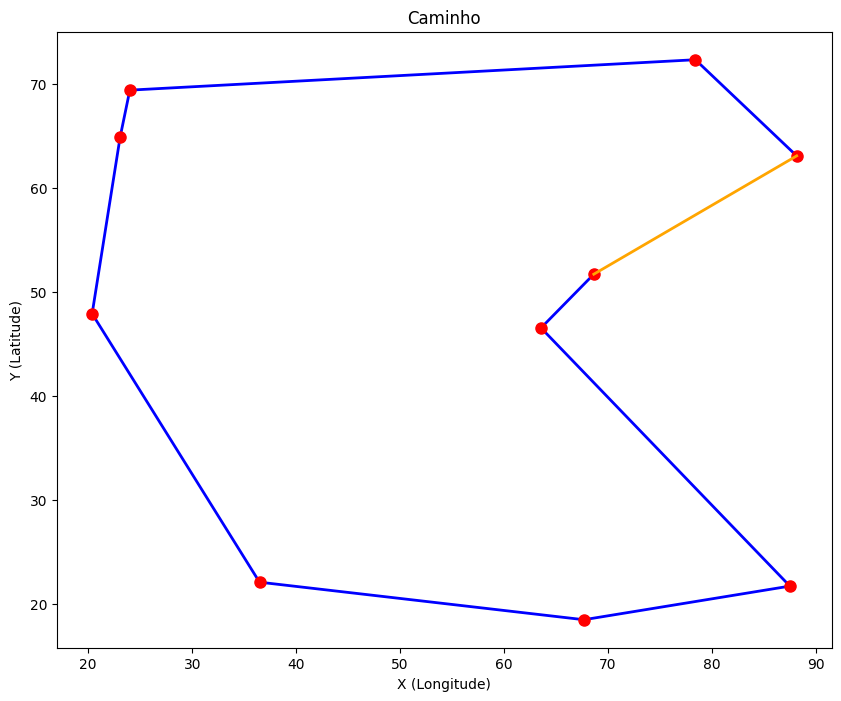

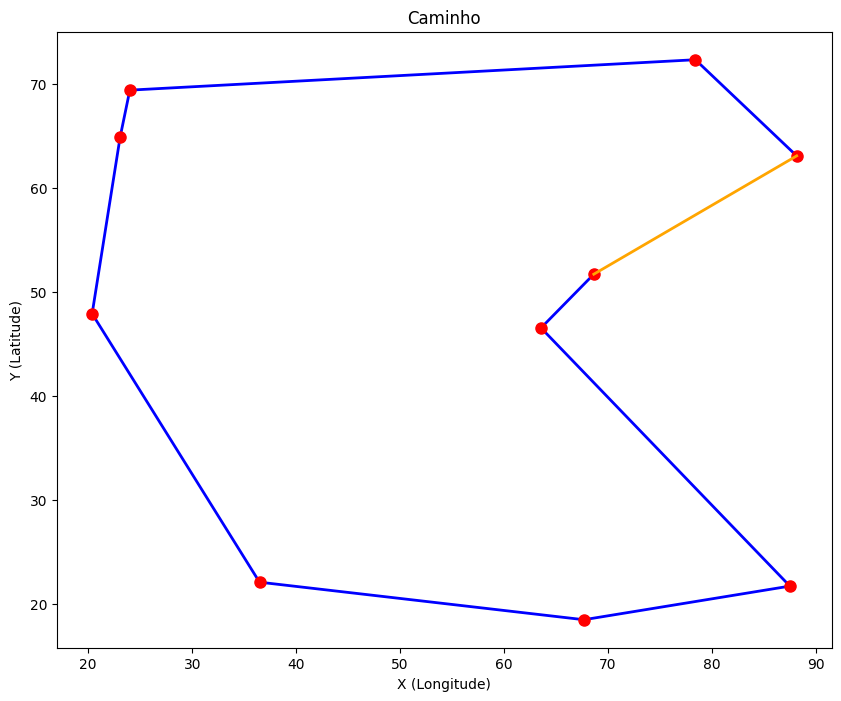

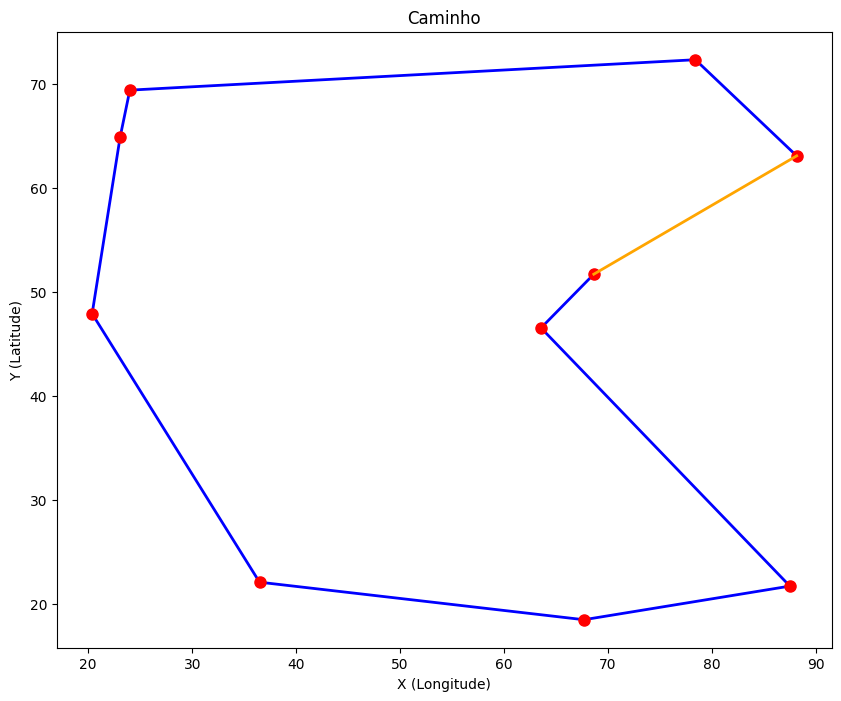

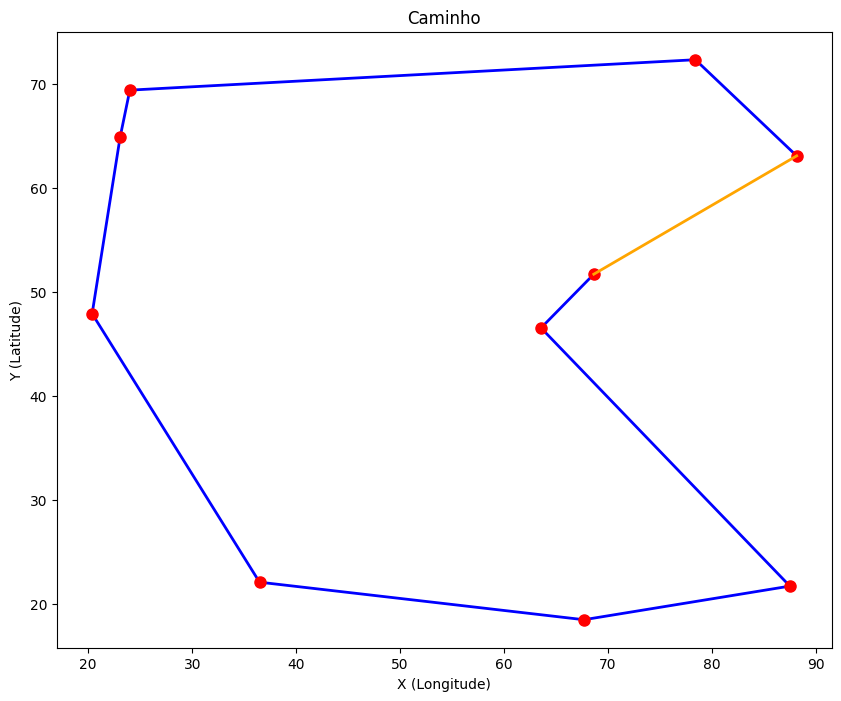

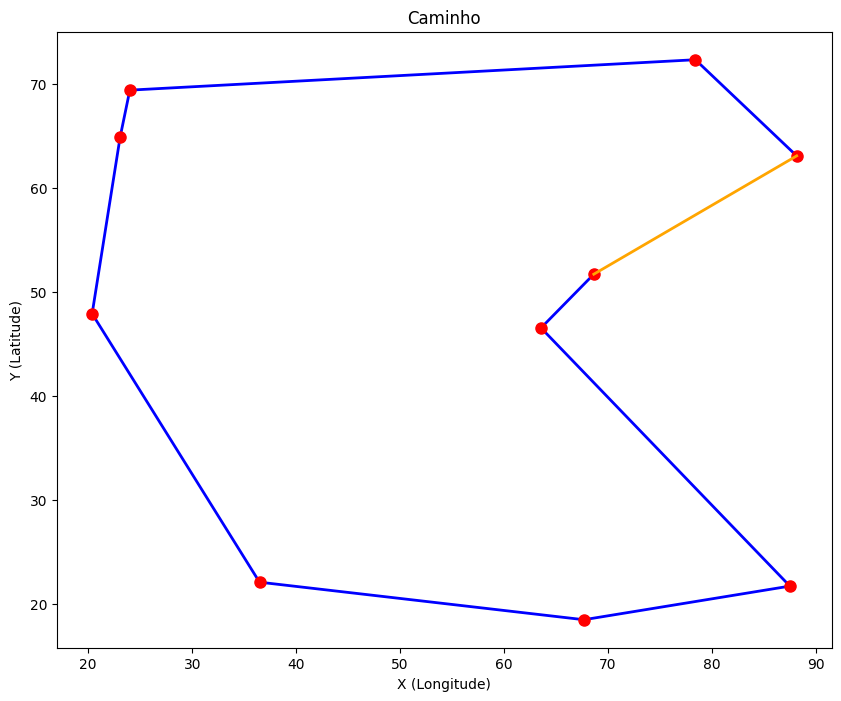

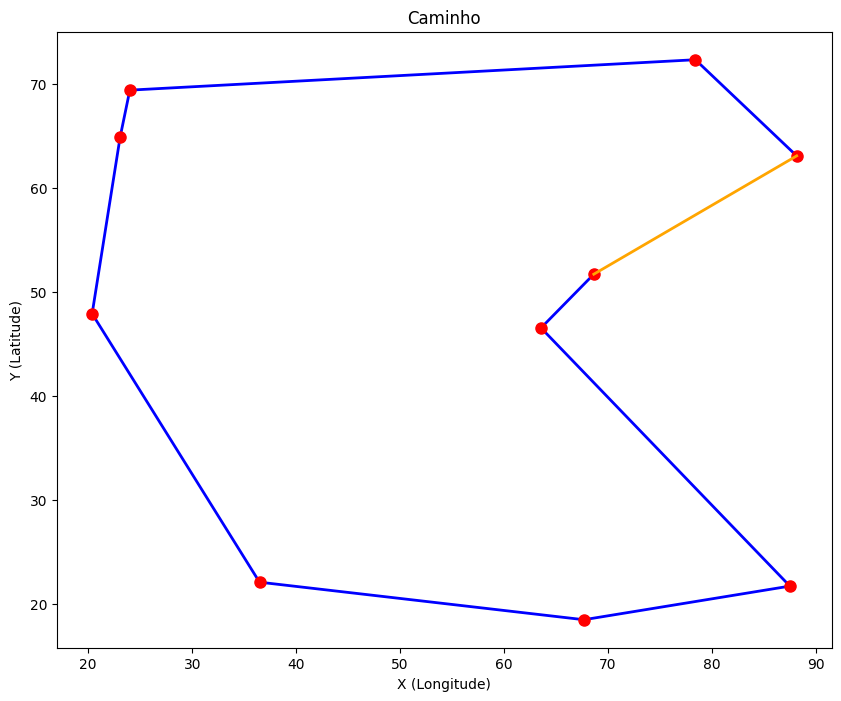

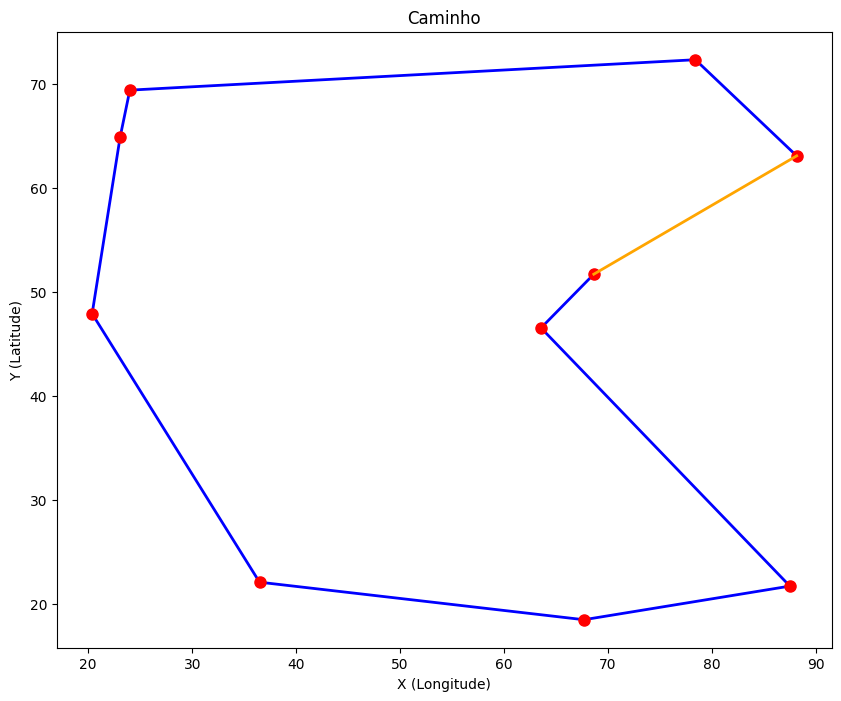

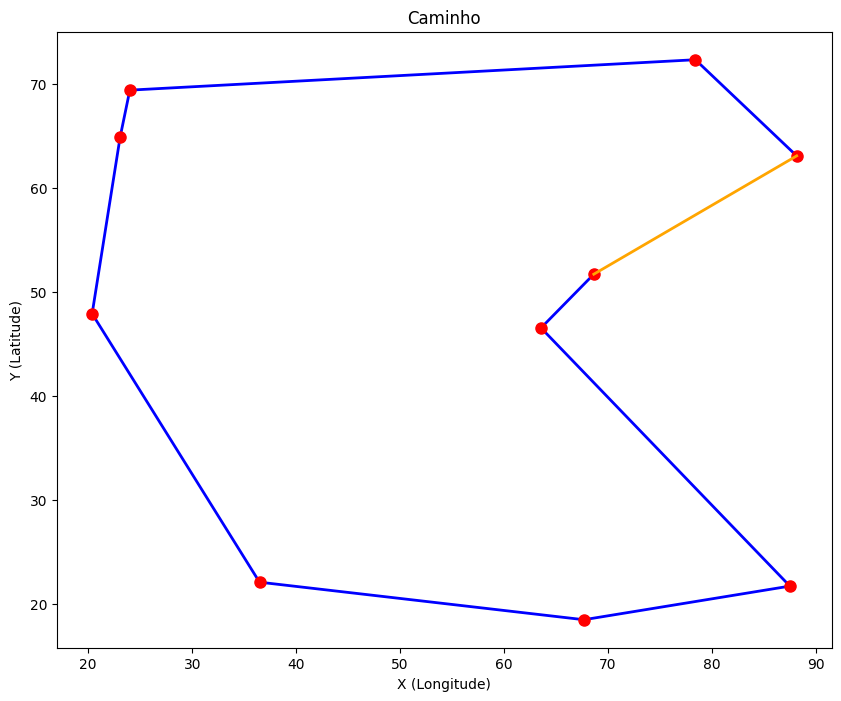

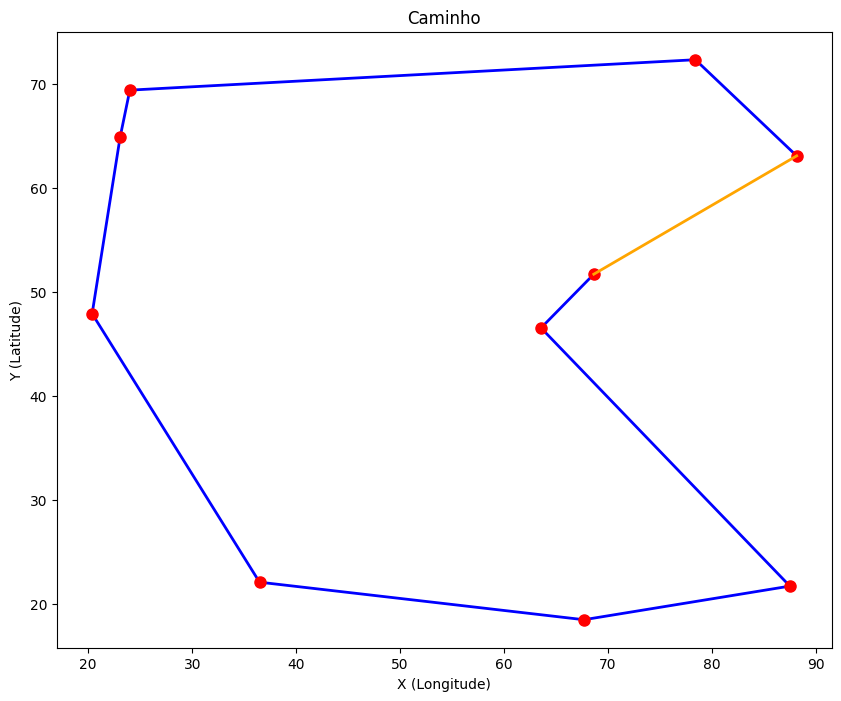

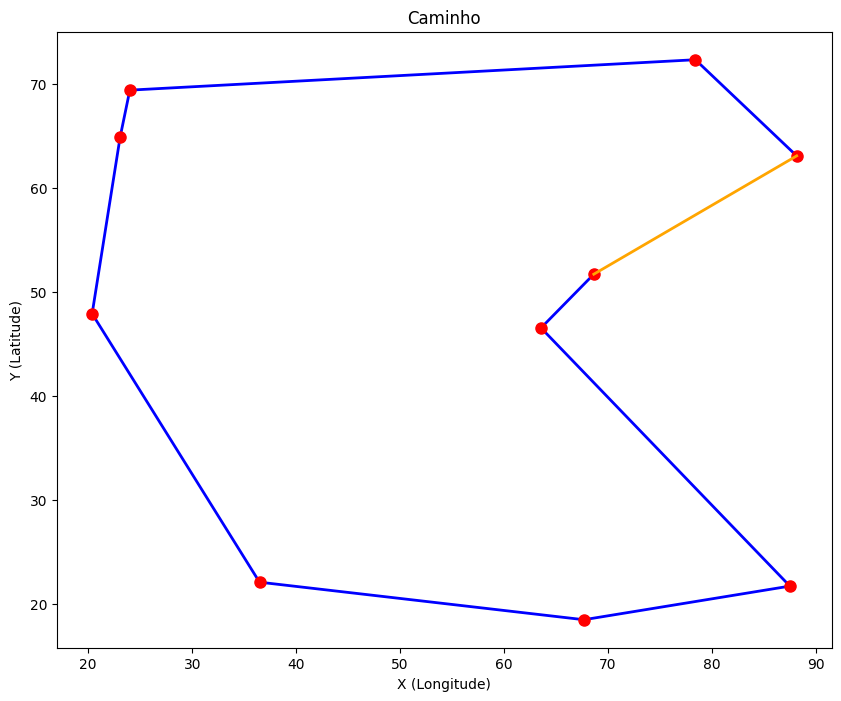

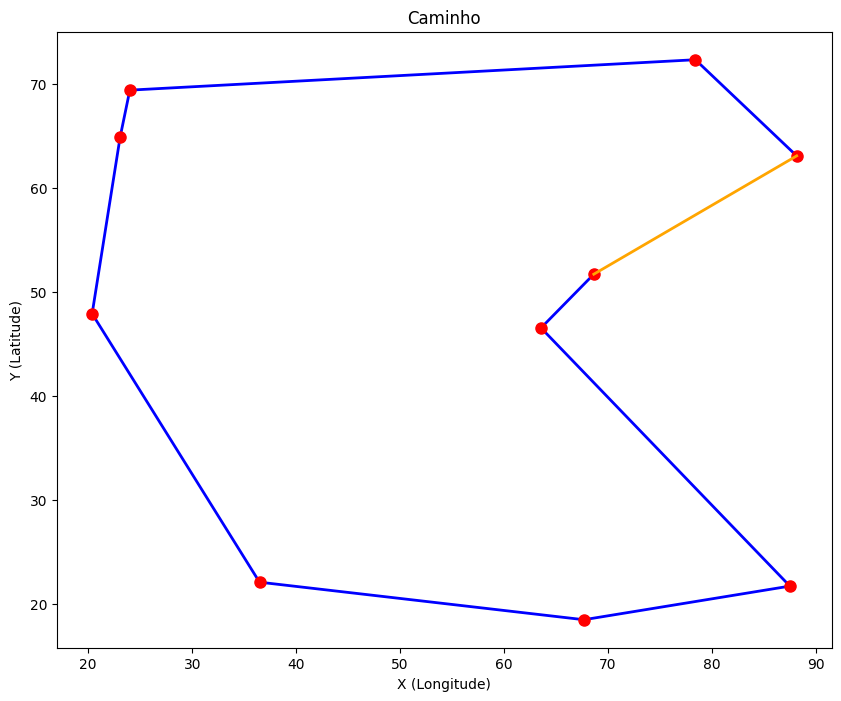

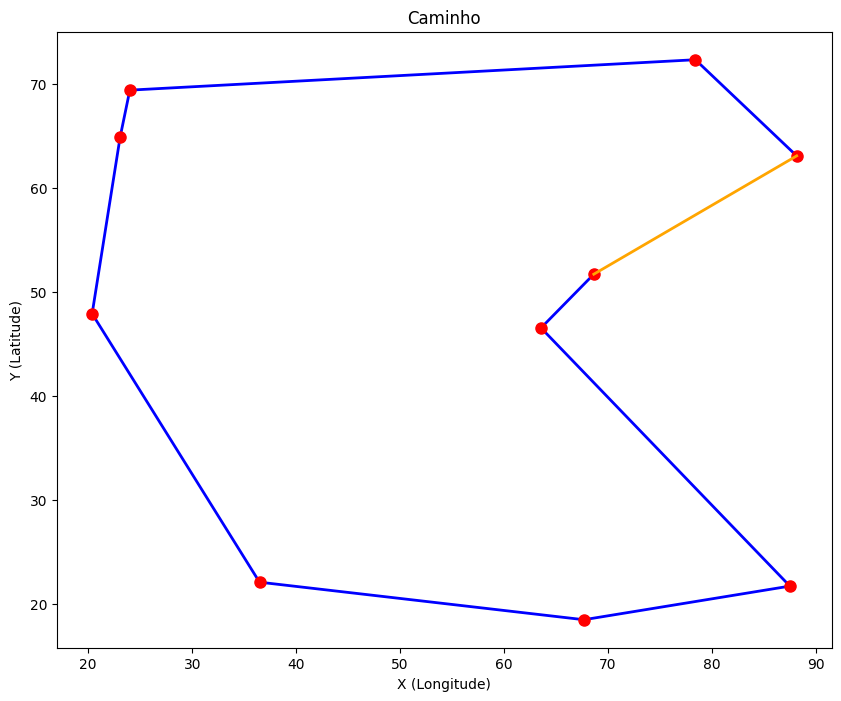

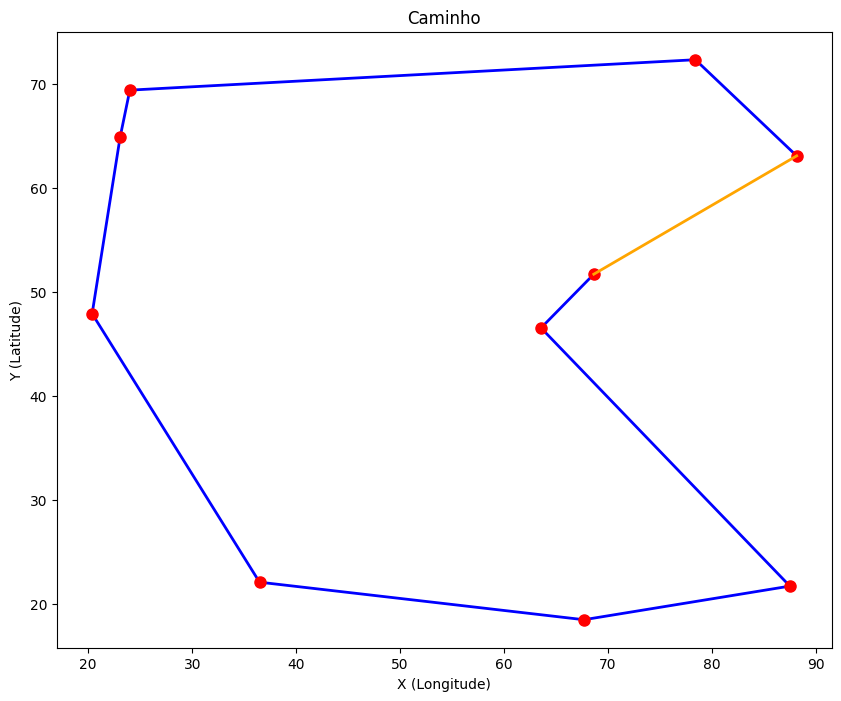

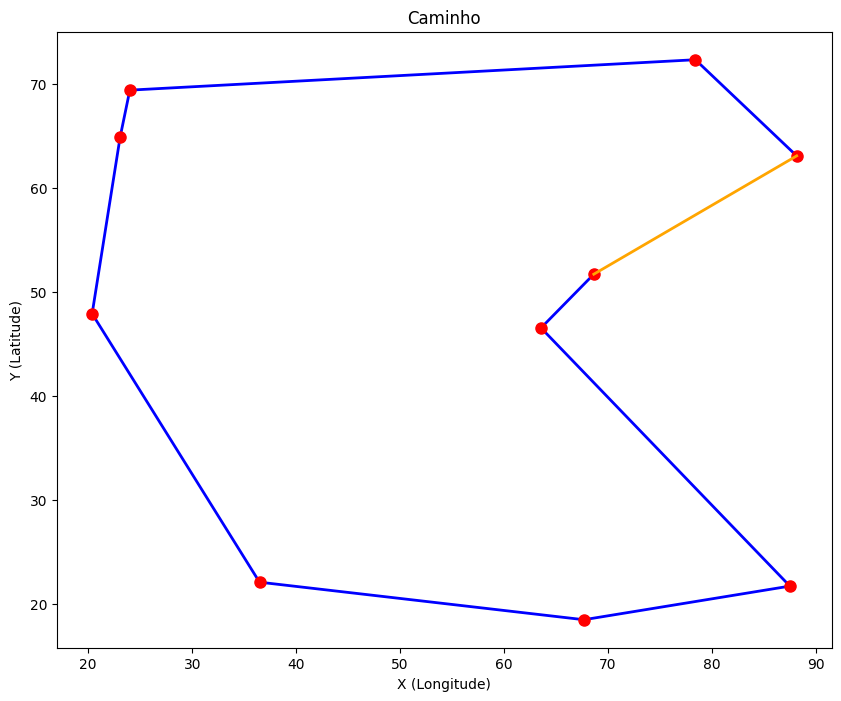

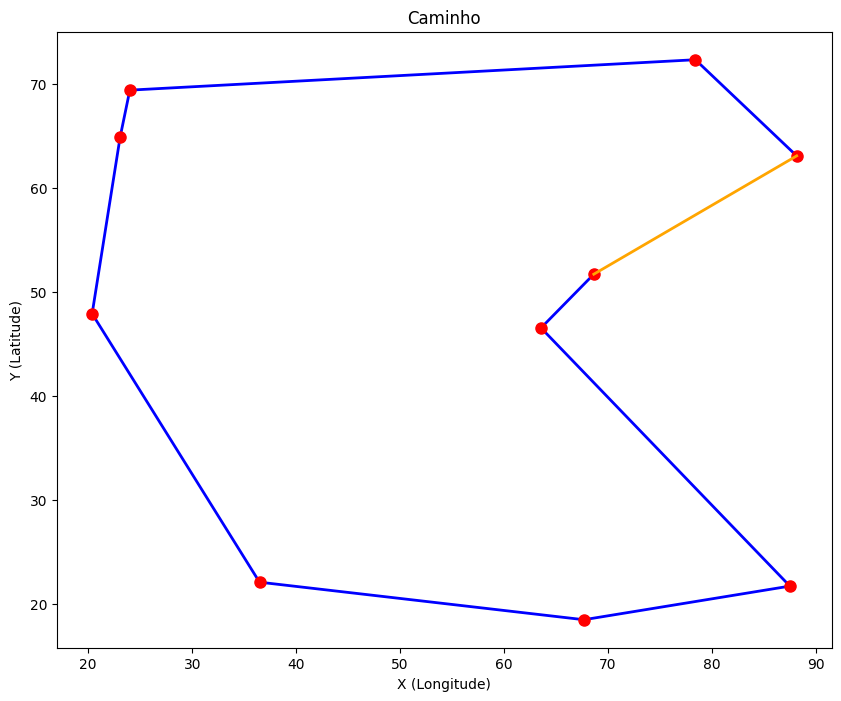

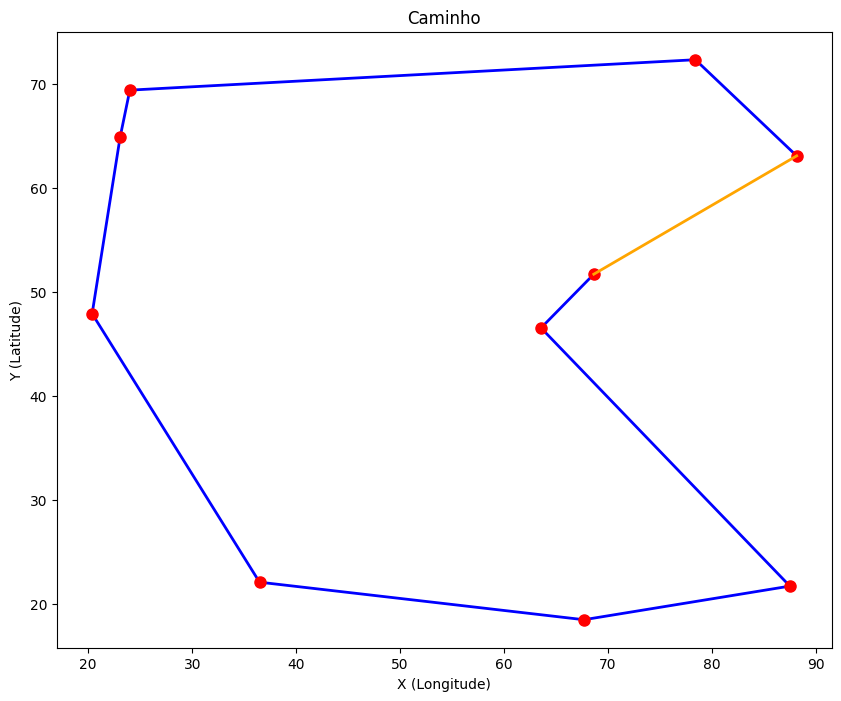

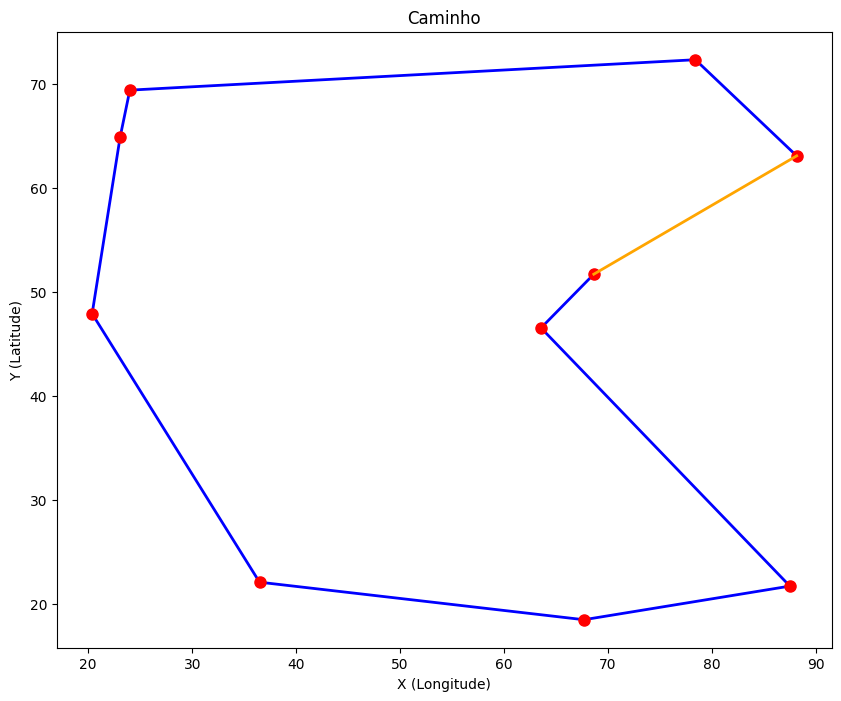

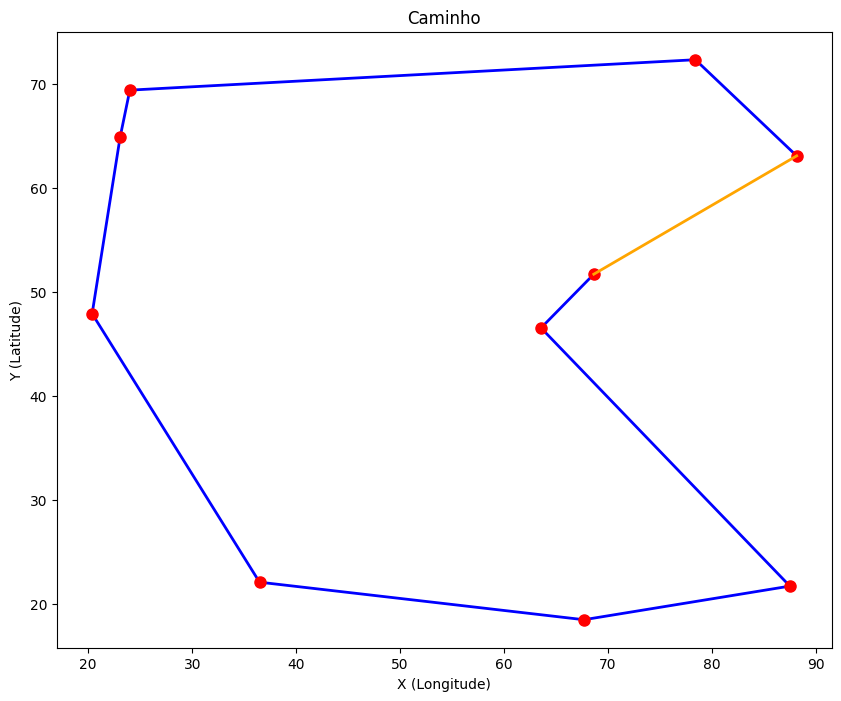

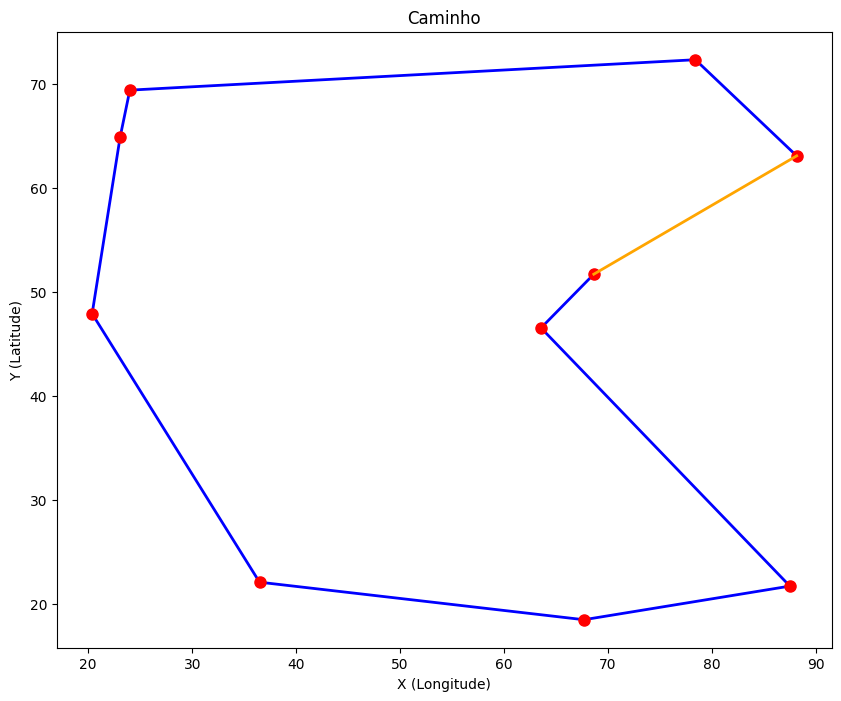

Best route: [1 5 9 3 0 8 7 6 2 4]
Best distance: 234.22634593663514


In [77]:
def main():
    # Exemplo de uso
    num_cities = 20
    cities = np.random.rand(num_cities, 2)

    initial_temperature = 1000.0
    cooling_rate = 0.995
    iterations = 4000

    best_route, best_distance = simulated_annealing(df_coordenadas, initial_temperature, cooling_rate, iterations)

    print("Best route:", best_route)
    print("Best distance:", best_distance)

main()

In [89]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

def plot_path(cities_xy, cities_path, ax):
    # Reordena as cidades pela ordem do caminho
    cities = cities_xy[cities_path]

    # Coordenadas x e y
    x = cities[:, 0]
    y = cities[:, 1]

    # Plotagem das coordenadas interligadas com pontos vermelhos e linhas azuis
    ax.plot(x, y, color='blue', linestyle='-', linewidth=2)
    ax.plot(x, y, color='red', marker='o', markersize=8, linestyle='')
    ax.plot(x[[-1, 0]], y[[-1, 0]], color='orange', linestyle='-', linewidth=2)

    # Personalização do gráfico
    ax.set_xlabel('X (Longitude)')
    ax.set_ylabel('Y (Latitude)')
    ax.set_title('Caminho')

def calculate_distance(city_a, city_b):
    return np.linalg.norm(city_a - city_b)

def total_distance(route, distance_matrix):
    total = 0
    for i in range(len(route) - 1):
        city_a = route[i]
        city_b = route[i + 1]
        total += distance_matrix[city_a, city_b]
    total += distance_matrix[route[-1], route[0]]  # Completa o ciclo
    return total

def generate_neighbor(route):
    new_route = route.copy()
    index_a = random.randint(0, len(route) - 1)
    index_b = random.randint(0, len(route) - 1)
    new_route[index_a], new_route[index_b] = new_route[index_b], new_route[index_a]
    return new_route

def acceptance_probability(current_distance, new_distance, temperature):
    if new_distance < current_distance:  # melhor == menor (<)
        return 1.0
    else:
        return math.exp((current_distance - new_distance) / temperature)

def plot_axes_figure(cities, current_route, iteration_list, distance_list, best_distances, accept_p_list, temperat_list):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Caminho atual
    plot_path(cities, current_route, axes[0, 0])

    # Evolução da distância total
    axes[0, 1].plot(iteration_list, distance_list, label='Distância Atual', color='blue')
    axes[0, 1].set_title('Evolução da Distância Total')
    axes[0, 1].set_xlabel('Iteração')
    axes[0, 1].set_ylabel('Distância')

    # Evolução da melhor distância encontrada
    axes[1, 0].plot(iteration_list, best_distances, label='Melhor Distância', color='green')
    axes[1, 0].set_title('Evolução da Melhor Distância')
    axes[1, 0].set_xlabel('Iteração')
    axes[1, 0].set_ylabel('Melhor Distância')

    # Evolução da probabilidade de aceitação e temperatura
    axes[1, 1].plot(iteration_list, accept_p_list, label='Probabilidade de Aceitação', color='red')
    axes[1, 1].plot(iteration_list, temperat_list, label='Temperatura', color='orange')
    axes[1, 1].set_title('Evolução da Probabilidade de Aceitação e Temperatura')
    axes[1, 1].set_xlabel('Iteração')
    axes[1, 1].set_ylabel('Valor')
    axes[1, 1].legend()

    plt.tight_layout()
    # plt.show()

def simulated_annealing(cities, initial_temperature, cooling_rate, iterations, nrep=50):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = calculate_distance(cities[i], cities[j])

    current_route = np.arange(num_cities)
    best_route = current_route.copy()

    current_distance = total_distance(current_route, distance_matrix)
    best_distance = current_distance

    temperature = initial_temperature

    #-----------------------------------------------
    iteration_list = []
    best_distances = []
    distance_list = []
    accept_p_list = []
    temperat_list = []
    #-----------------------------------------------

    for iteration in range(iterations):

        # Número de vizinhos a serem gerados e testados para cada iteração
        for _ in range(nrep):
            new_route = generate_neighbor(current_route)
            new_distance = total_distance(new_route, distance_matrix)
            acceptance_prob = acceptance_probability(current_distance, new_distance, temperature)

            if random.random() < acceptance_prob:
                current_route = new_route
                current_distance = new_distance

        temperature *= cooling_rate

        #-----------------------------------------------
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        iteration_list += [iteration]
        best_distances += [best_distance]
        distance_list += [current_distance]
        accept_p_list += [acceptance_prob]
        temperat_list += [temperature]

        if iteration % 50 == 0:
            plot_axes_figure(cities, current_route, iteration_list,
                             distance_list, best_distances,
                             accept_p_list, temperat_list)
        #-----------------------------------------------

    return best_route, best_distance



In [90]:
def main():
    # Exemplo de uso
    num_cities = 20
    cities = np.random.rand(num_cities, 2)

    initial_temperature = 1000.0
    cooling_rate = 0.995
    iterations = 4000

    best_route, best_distance = simulated_annealing(df_coordenadas, initial_temperature, cooling_rate, iterations)

    print("Best route:", best_route)
    print("Best distance:", best_distance)

main()

KeyError: 0

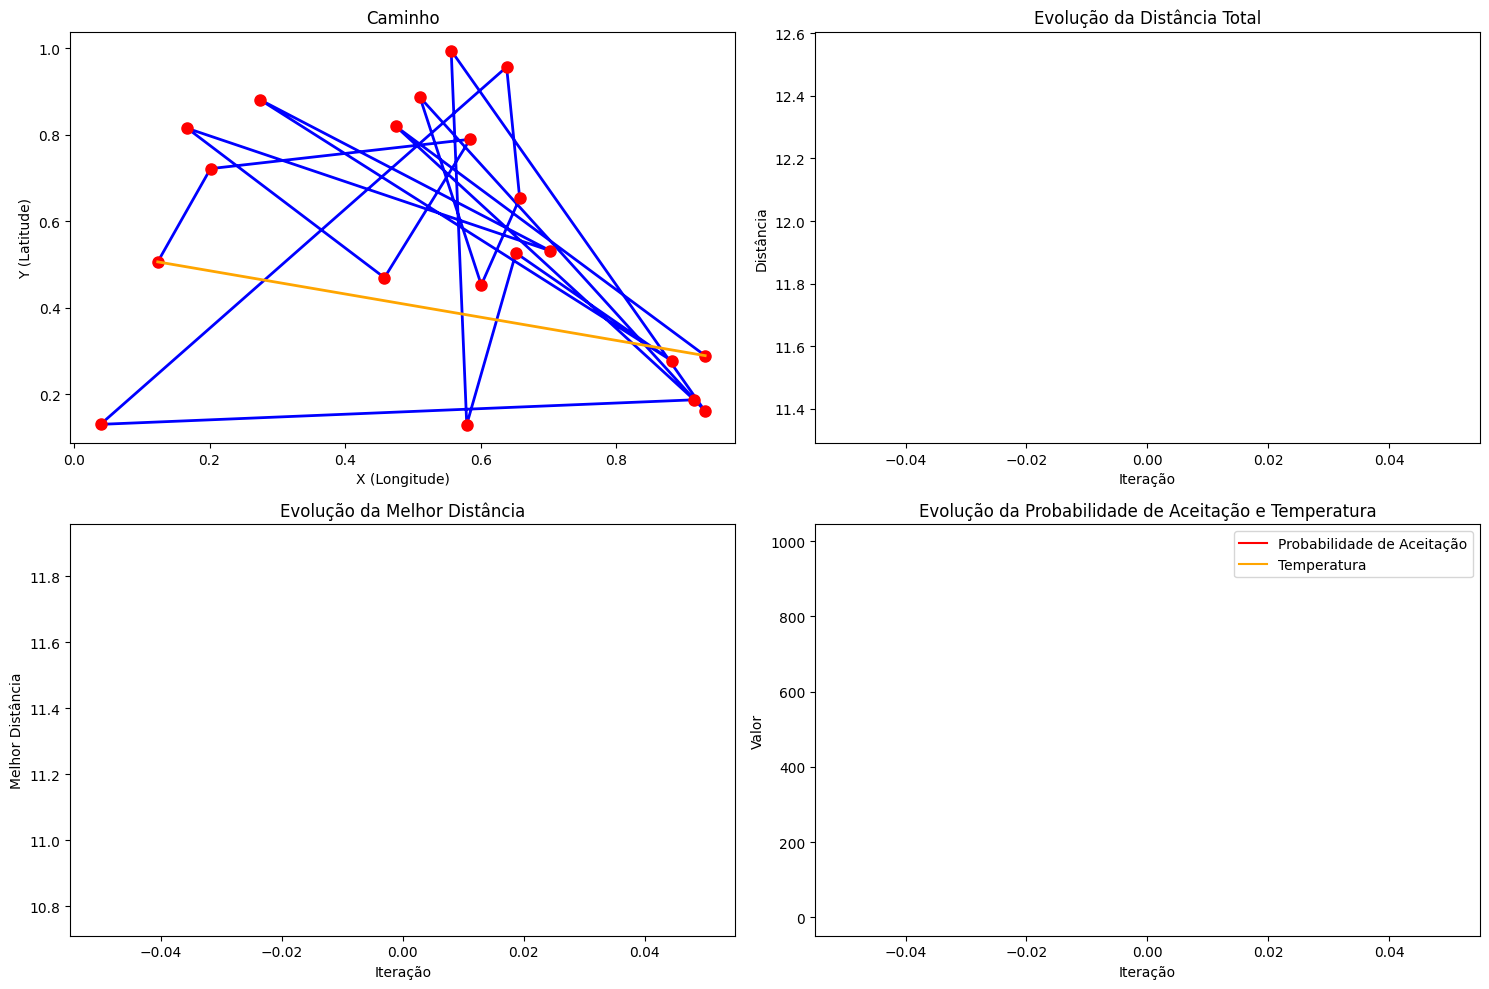

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Best route: [17 12  1  7  5 15 18  2 13  8  3  0 10  6 19 14  4  9 16 11]
Best distance: 3.597872387340458


In [88]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

def plot_path(cities_xy, cities_path, ax):
    # Reordena as cidades pela ordem do caminho
    cities = cities_xy[cities_path]

    # Coordenadas x e y
    x = cities[:, 0]
    y = cities[:, 1]

    # Limpa o gráfico anterior
    ax.clear()

    # Plotagem das coordenadas interligadas com pontos vermelhos e linhas azuis
    ax.plot(x, y, color='blue', linestyle='-', linewidth=2)
    ax.plot(x, y, color='red', marker='o', markersize=8, linestyle='')
    ax.plot(x[[-1, 0]], y[[-1, 0]], color='orange', linestyle='-', linewidth=2)

    # Personalização do gráfico
    ax.set_xlabel('X (Longitude)')
    ax.set_ylabel('Y (Latitude)')
    ax.set_title('Caminho')

def calculate_distance(city_a, city_b):
    return np.linalg.norm(city_a - city_b)

def total_distance(route, distance_matrix):
    total = 0
    for i in range(len(route) - 1):
        city_a = route[i]
        city_b = route[i + 1]
        total += distance_matrix[city_a, city_b]
    total += distance_matrix[route[-1], route[0]]  # Completa o ciclo
    return total

def generate_neighbor(route):
    new_route = route.copy()
    index_a = random.randint(0, len(route) - 1)
    index_b = random.randint(0, len(route) - 1)
    new_route[index_a], new_route[index_b] = new_route[index_b], new_route[index_a]
    return new_route

def acceptance_probability(current_distance, new_distance, temperature):
    if new_distance < current_distance:  # melhor == menor (<)
        return 1.0
    else:
        return math.exp((current_distance - new_distance) / temperature)

def plot_axes_figure(cities, current_route, iteration_list, distance_list, best_distances, accept_p_list, temperat_list, axes):
    # Caminho atual
    plot_path(cities, current_route, axes[0, 0])

    # Evolução da distância total
    axes[0, 1].clear()
    axes[0, 1].plot(iteration_list, distance_list, label='Distância Atual', color='blue')
    axes[0, 1].set_title('Evolução da Distância Total')
    axes[0, 1].set_xlabel('Iteração')
    axes[0, 1].set_ylabel('Distância')

    # Evolução da melhor distância encontrada
    axes[1, 0].clear()
    axes[1, 0].plot(iteration_list, best_distances, label='Melhor Distância', color='green')
    axes[1, 0].set_title('Evolução da Melhor Distância')
    axes[1, 0].set_xlabel('Iteração')
    axes[1, 0].set_ylabel('Melhor Distância')

    # Evolução da probabilidade de aceitação e temperatura
    axes[1, 1].clear()
    axes[1, 1].plot(iteration_list, accept_p_list, label='Probabilidade de Aceitação', color='red')
    axes[1, 1].plot(iteration_list, temperat_list, label='Temperatura', color='orange')
    axes[1, 1].set_title('Evolução da Probabilidade de Aceitação e Temperatura')
    axes[1, 1].set_xlabel('Iteração')
    axes[1, 1].set_ylabel('Valor')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.draw()  # Redesenha a figura

def simulated_annealing(cities, initial_temperature, cooling_rate, iterations, nrep=50):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = calculate_distance(cities[i], cities[j])

    current_route = np.arange(num_cities)
    best_route = current_route.copy()

    current_distance = total_distance(current_route, distance_matrix)
    best_distance = current_distance

    temperature = initial_temperature

    #-----------------------------------------------
    iteration_list = []
    best_distances = []
    distance_list = []
    accept_p_list = []
    temperat_list = []
    #-----------------------------------------------

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    plt.ion()  # Torna a plotagem interativa

    for iteration in range(iterations):

        # Número de vizinhos a serem gerados e testados para cada iteração
        for _ in range(nrep):
            new_route = generate_neighbor(current_route)
            new_distance = total_distance(new_route, distance_matrix)
            acceptance_prob = acceptance_probability(current_distance, new_distance, temperature)

            if random.random() < acceptance_prob:
                current_route = new_route
                current_distance = new_distance

        temperature *= cooling_rate

        #-----------------------------------------------
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        iteration_list += [iteration]
        best_distances += [best_distance]
        distance_list += [current_distance]
        accept_p_list += [acceptance_prob]
        temperat_list += [temperature]

        if iteration % 50 == 0:
            plot_axes_figure(cities, current_route, iteration_list,
                             distance_list, best_distances,
                             accept_p_list, temperat_list, axes)
            plt.pause(0.01)  # Pausa para atualizar o gráfico

    plt.ioff()  # Desativa a plotagem interativa
    plt.show()

    return best_route, best_distance

def main():
    # Exemplo de uso
    num_cities = 20
    cities_df = pd.DataFrame({
        'X': np.random.rand(num_cities),
        'Y': np.random.rand(num_cities)
    })

    cities = cities_df.values  # Converte o DataFrame para um array NumPy

    initial_temperature = 1000.0
    cooling_rate = 0.995
    iterations = 4000

    best_route, best_distance = simulated_annealing(cities, initial_temperature, cooling_rate, iterations)

    print("Best route:", best_route)
    print("Best distance:", best_distance)

if __name__ == '__main__':
    main()
